In [19]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd
import sys
sys.path.append('/Users/yat-lok/workspaces/tvbtools/')
from tools.signaltools import SignalToolkit
import pywt


In [40]:
def granger_causal(x1, x2, group, caseid):
    # Compute Granger causality
    x1 = np.array(x1)
    x2= np.array(x2)
    data = np.column_stack((x1, x2))
    gc_res = grangercausalitytests(data, 1)

    inner_keys = list(gc_res[list(gc_res)[0]][0])

    pvalues = [gc_res[list(gc_res)[0]][0][i][1] for i in inner_keys]
    print(f'Granger causality p-values of {group}, {caseid} from right to left is:', pvalues)
    return pvalues

def cross_corr(x1, x2):
    # Compute their cross-correlation function
    cross_corr = np.correlate(x1, x2, mode='full')
    lags = np.arange(-len(x1) + 1, len(x1))
    plt.figure()
    plt.plot(lags, cross_corr)
    plt.xlabel('Lag')
    plt.ylabel('Cross-correlation')
    plt.title('Cross-correlation function')
    # plt.show()

def corr(x1, x2, group, caseid):
    # Compute their correlation coefficient
    corr_coef = np.corrcoef(x1, x2)[0, 1]
    print(f'Correlation coefficient of {group}_{caseid}:', corr_coef)


def fourier_diff(x1, x2, group, caseid):
    # Generate two sample signals with different frequency content
    t = np.linspace(0,1,len(x1))

    # Compute the FFT of the two signals
    X1 = np.fft.fft(x1)
    X2 = np.fft.fft(x2)

    # Compute the magnitudes of the FFT coefficients
    mag1 = np.abs(X1)
    mag2 = np.abs(X2)

    # Calculate the difference in magnitudes at each frequency bin
    diff = mag1 - mag2
    return(np.argmax(diff))
    # Plot the magnitude spectra and the difference
    # freqs = np.fft.fftfreq(len(t), t[1] - t[0])
    # plt.plot(freqs, mag1, label='Signal 1')
    # plt.plot(freqs, mag2, label='Signal 2')
    # plt.plot(freqs, diff, label='Difference')
    # plt.title(f'{group}, {caseid}')
    # plt.legend()
    # plt.show()

def wavelet_diff(x1,x2, group, caseid):
    # Generate two sample signals with different frequency content

    # t = np.linspace(0, 1, 1000)
    # x1 = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 20 * t)
    # x2 = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 30 * t)

    # Choose a wavelet function and a decomposition level
    wavelet = 'db4'
    level = 5

    # Apply the wavelet transform to both signals
    coeffs1 = pywt.wavedec(x1, wavelet, level=level)
    coeffs2 = pywt.wavedec(x2, wavelet, level=level)

    # Calculate the magnitudes of the wavelet coefficients
    mag1 = [np.abs(c) for c in coeffs1]
    mag2 = [np.abs(c) for c in coeffs2]

    # Calculate the difference in magnitudes at each decomposition level
    diff = [np.abs(m1 - m2) for m1, m2 in zip(mag1, mag2)]
    # Plot the wavelet coefficients and the difference
    plt.figure(figsize=(8, 6))
    for i in range(level):
        plt.subplot(level, 2, 2 * i + 1)
        plt.plot(mag1[i], label='Signal 1')
        plt.plot(mag2[i], label='Signal 2')
        plt.title('Level {}'.format(i))
        plt.legend()
        plt.subplot(level, 2, 2 * i + 2)
        plt.plot(diff[i], label='Difference')
        plt.legend()
        plt.tight_layout()
        plt.title(f'{group}, {caseid}')
        plt.show()

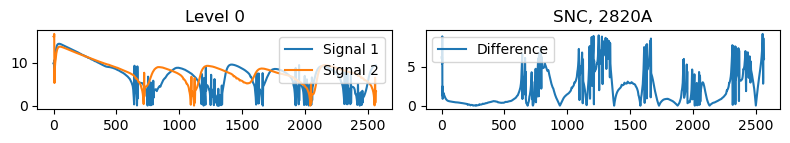

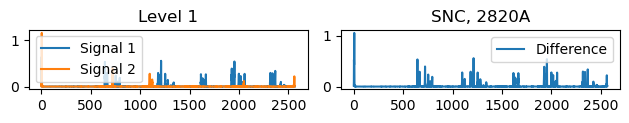

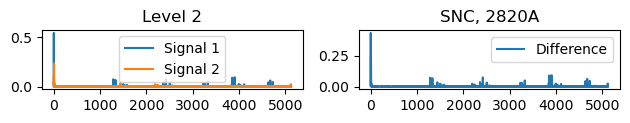

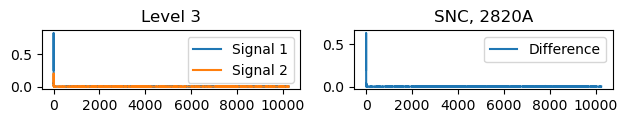

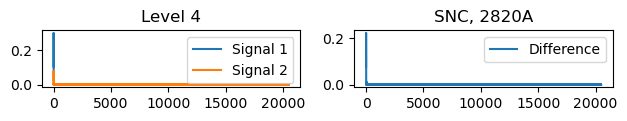

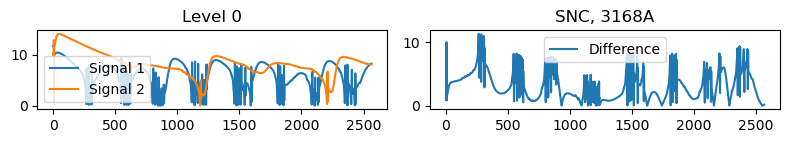

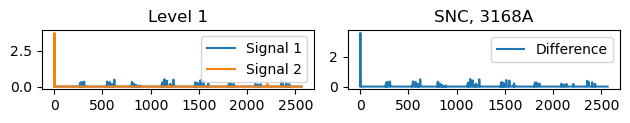

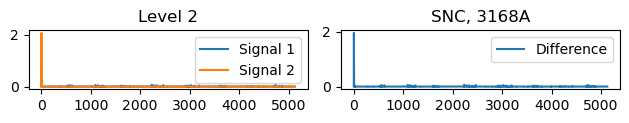

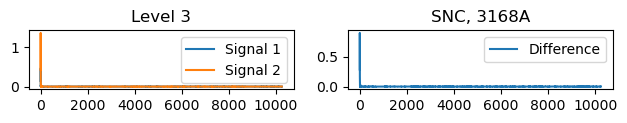

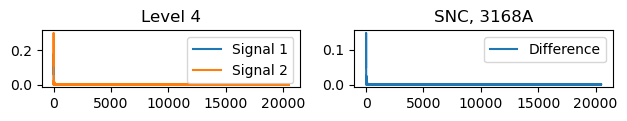

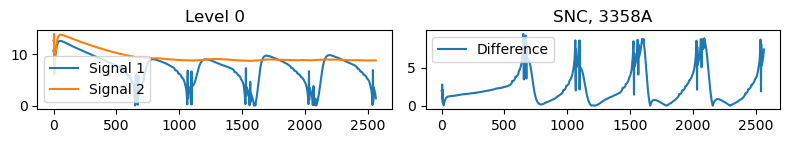

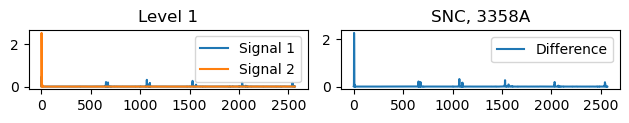

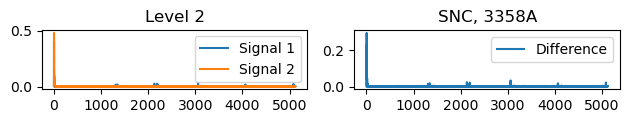

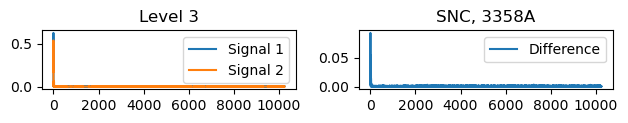

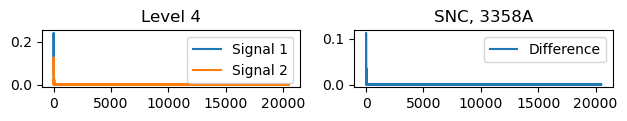

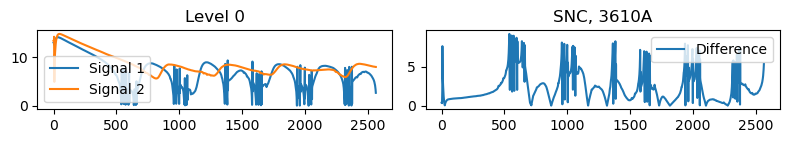

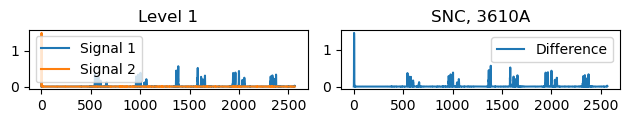

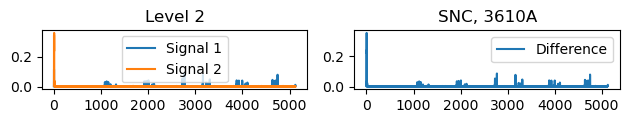

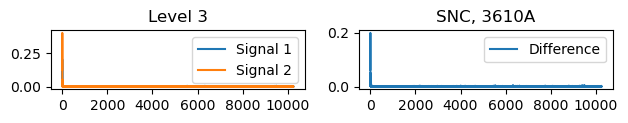

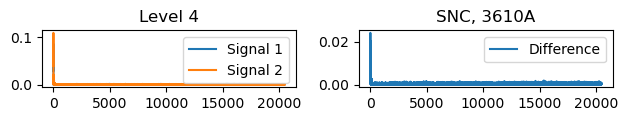

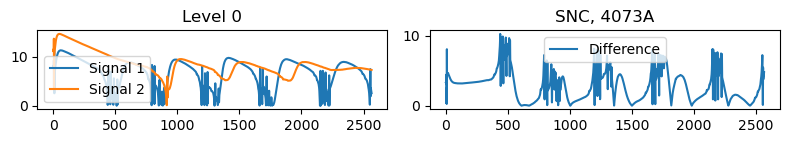

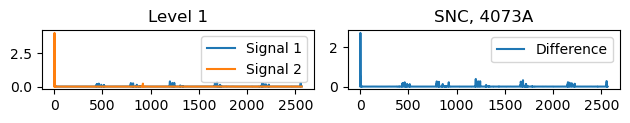

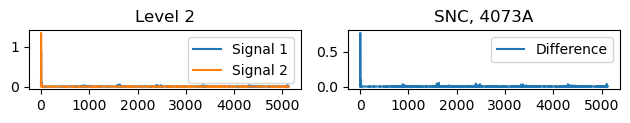

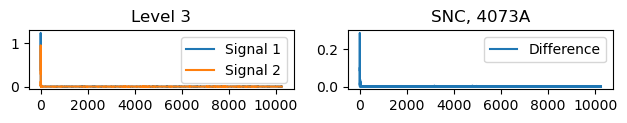

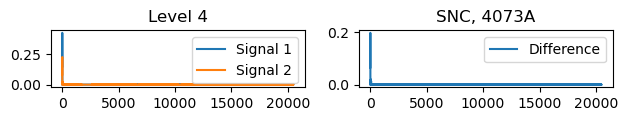

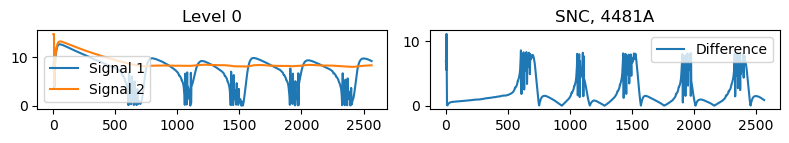

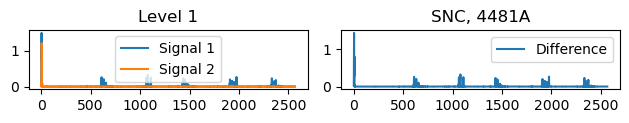

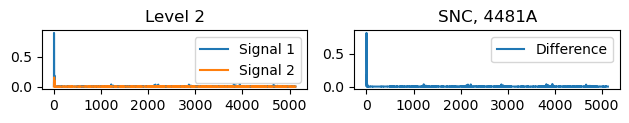

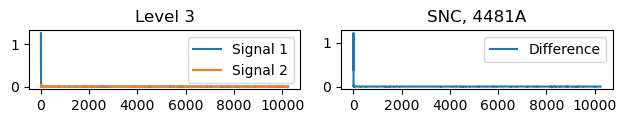

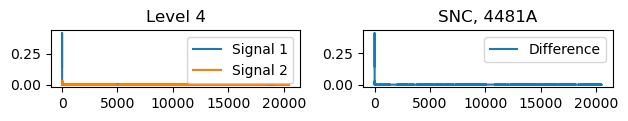

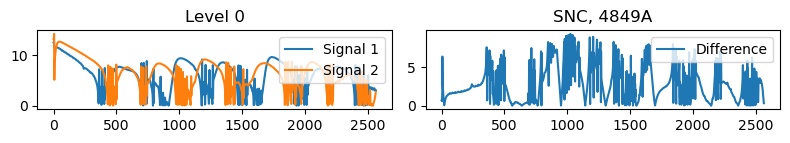

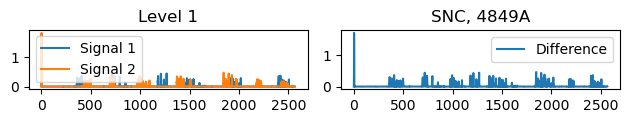

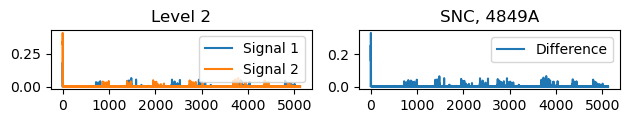

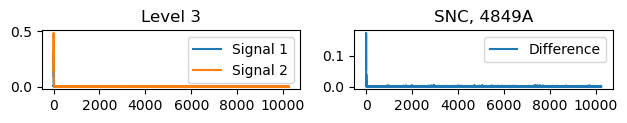

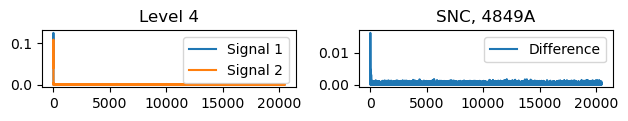

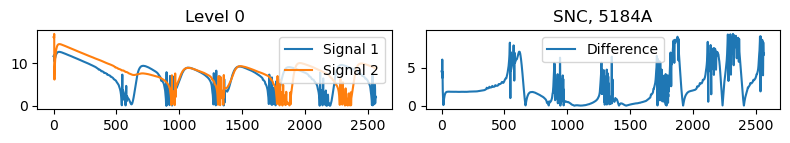

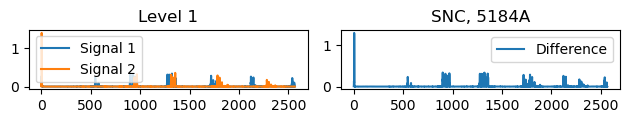

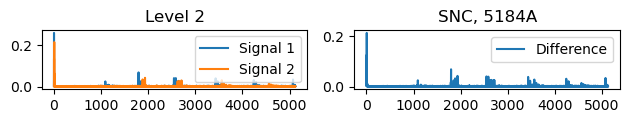

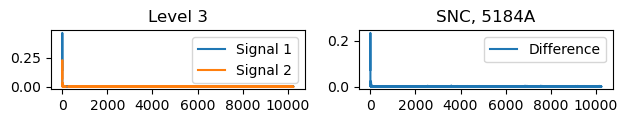

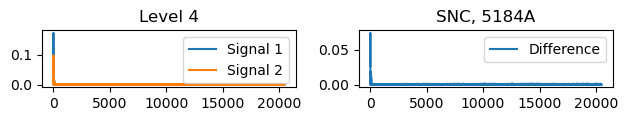

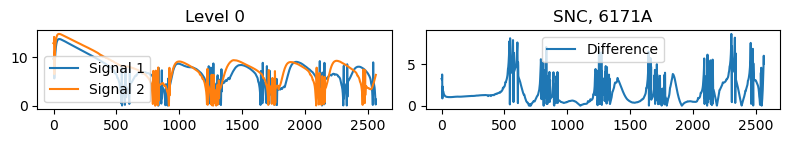

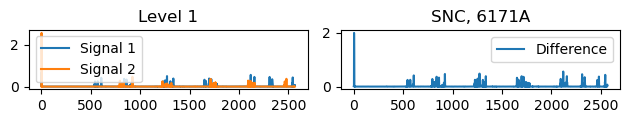

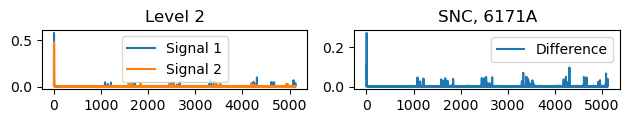

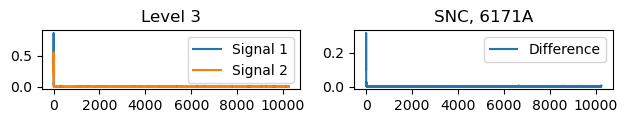

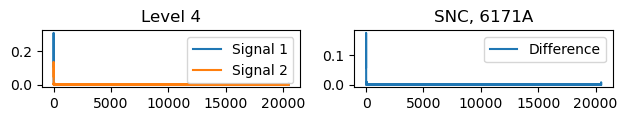

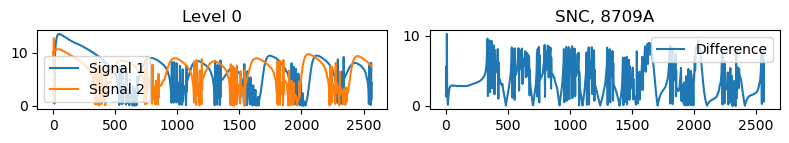

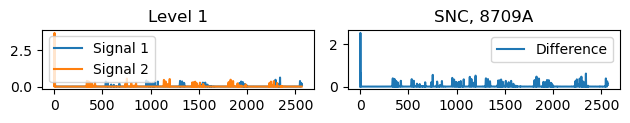

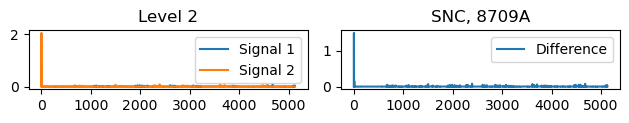

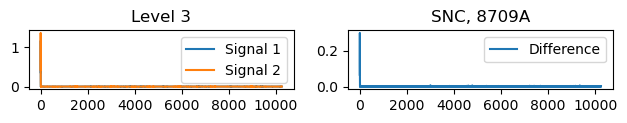

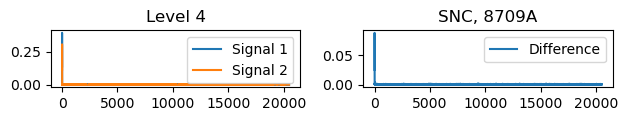

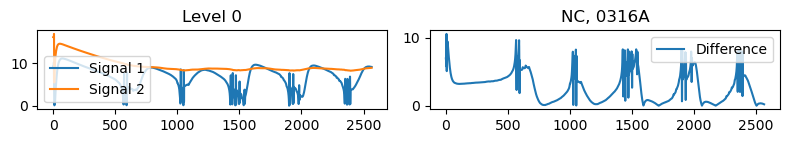

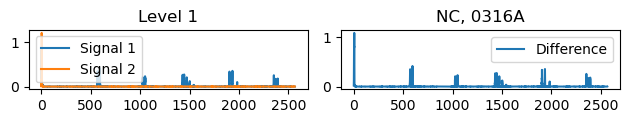

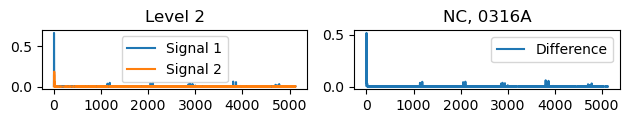

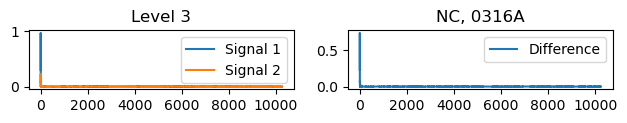

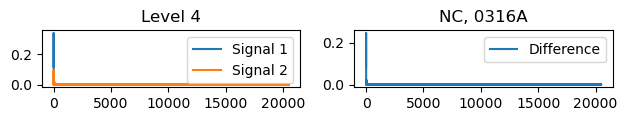

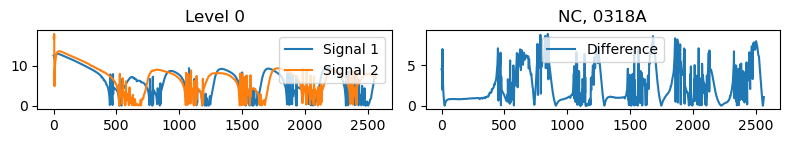

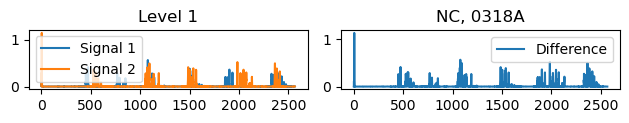

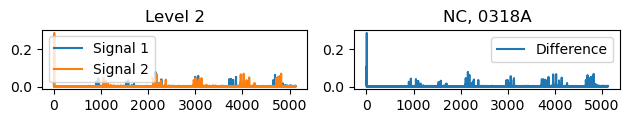

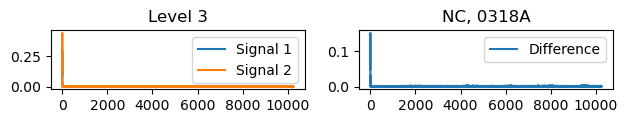

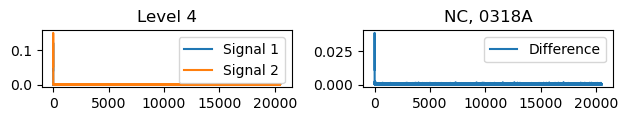

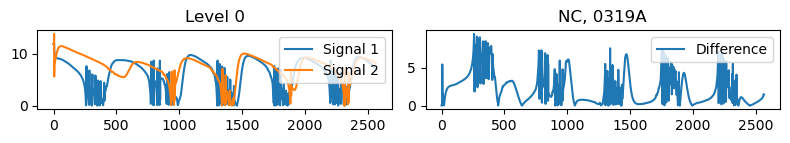

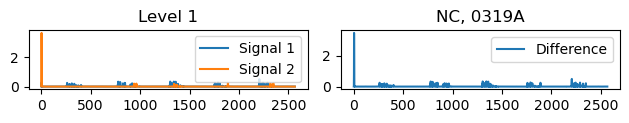

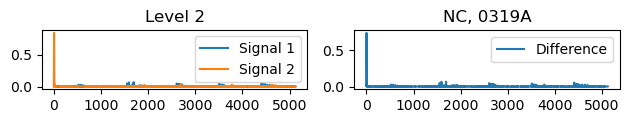

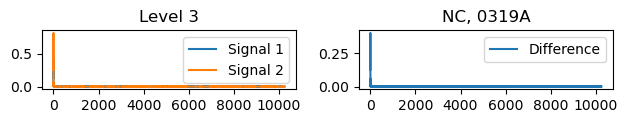

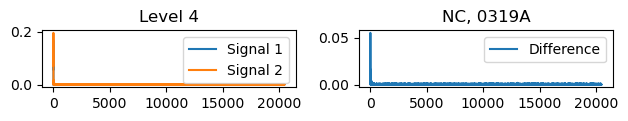

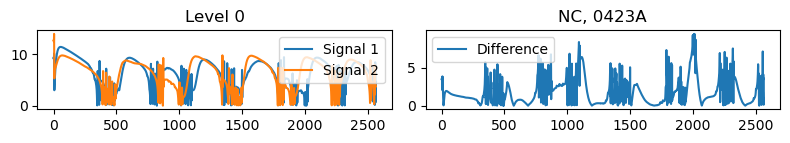

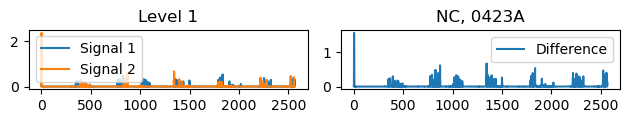

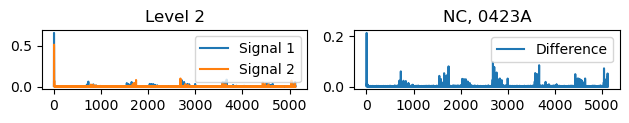

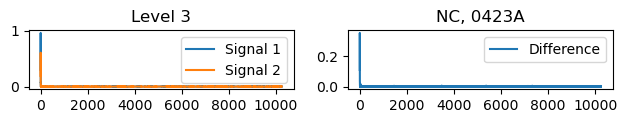

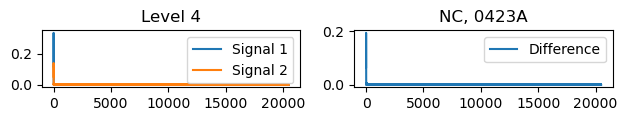

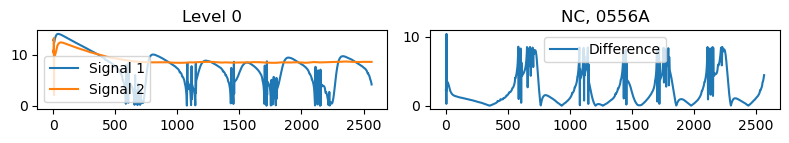

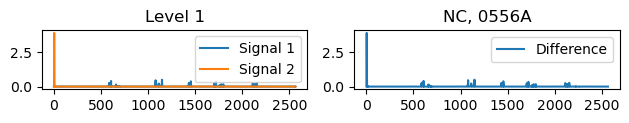

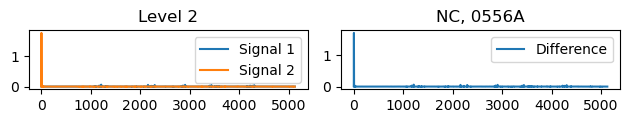

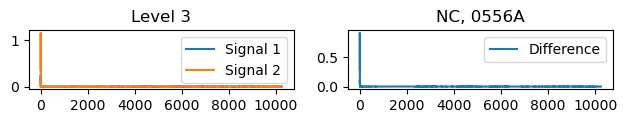

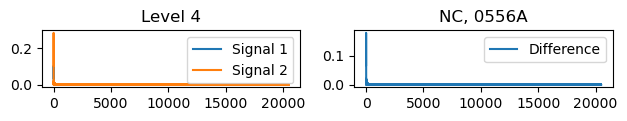

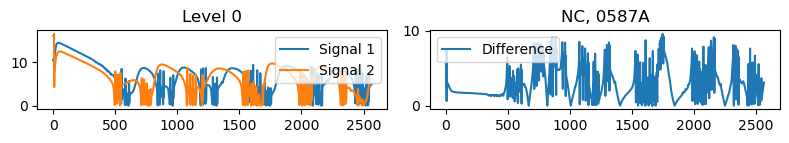

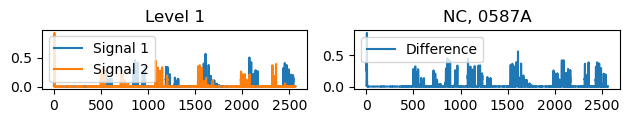

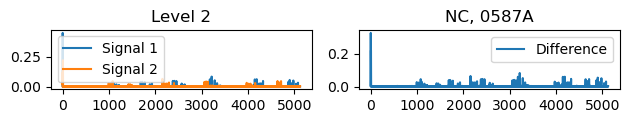

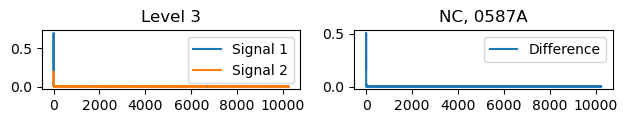

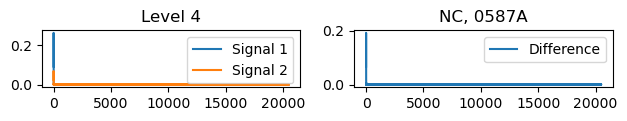

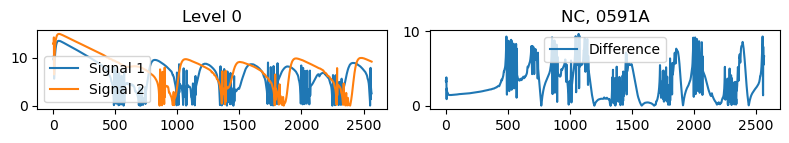

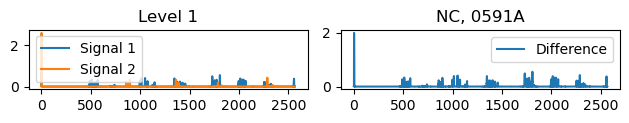

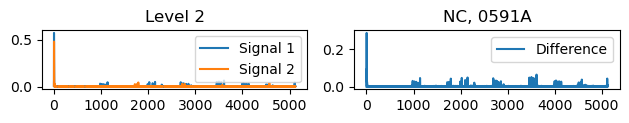

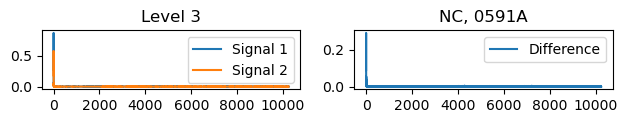

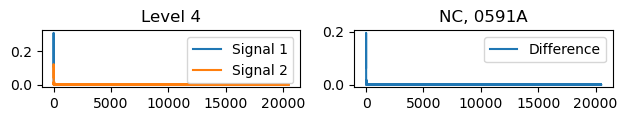

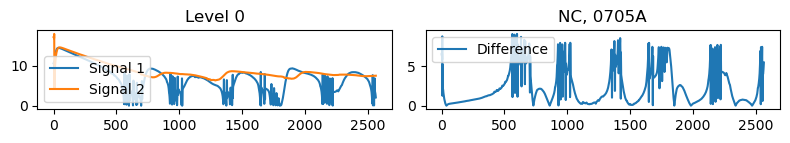

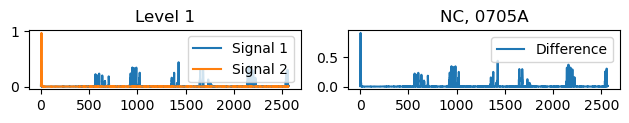

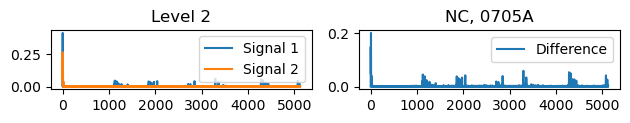

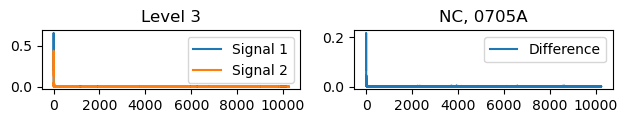

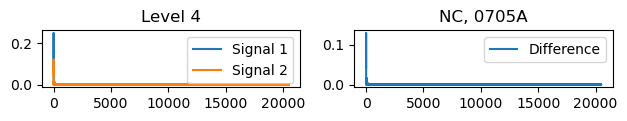

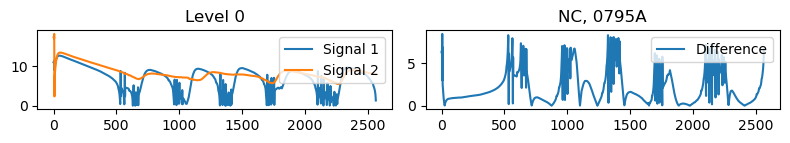

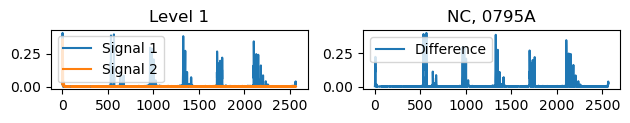

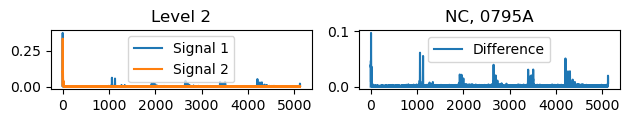

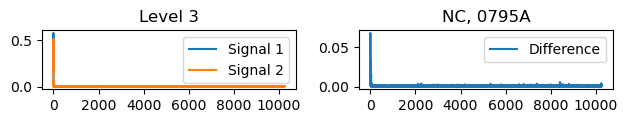

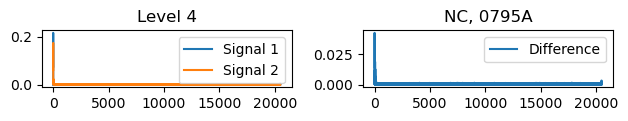

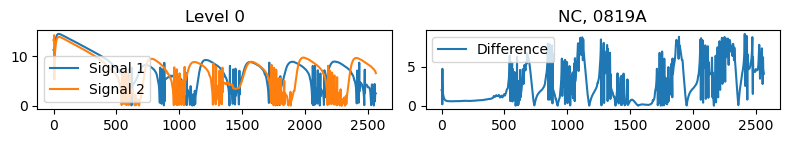

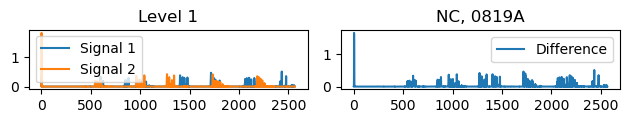

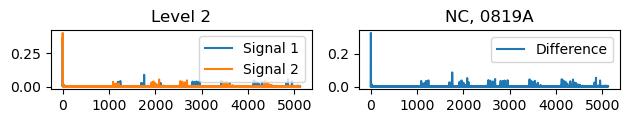

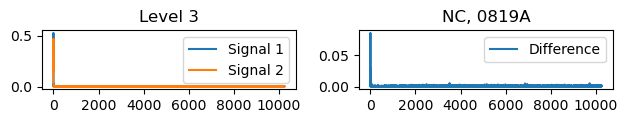

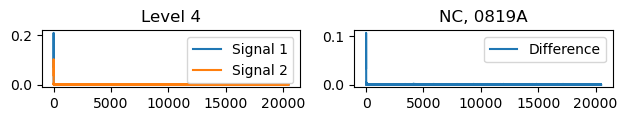

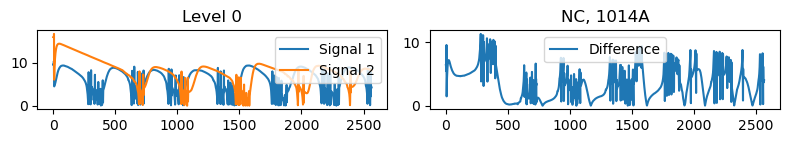

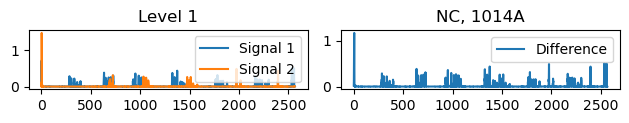

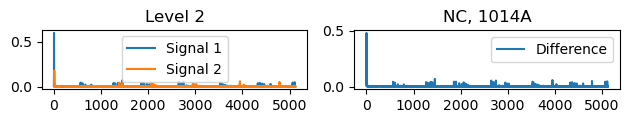

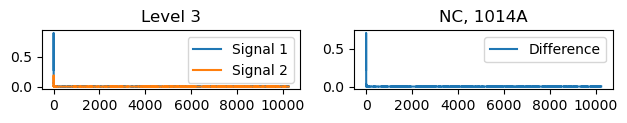

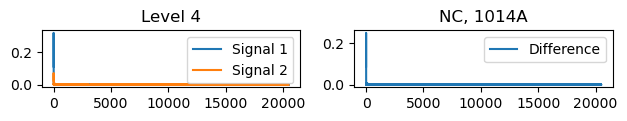

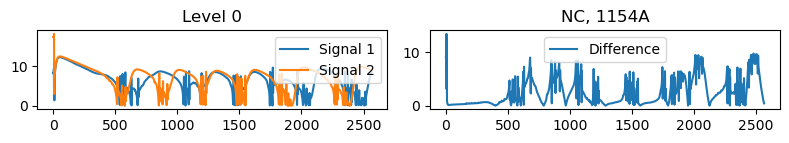

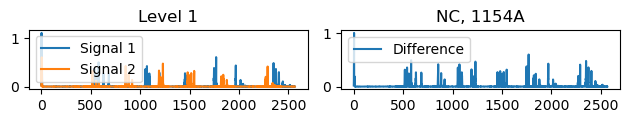

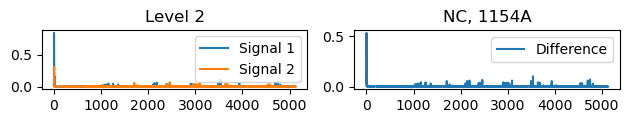

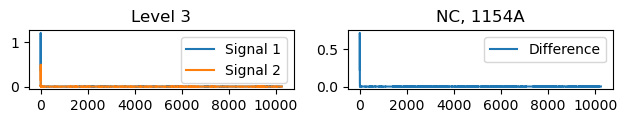

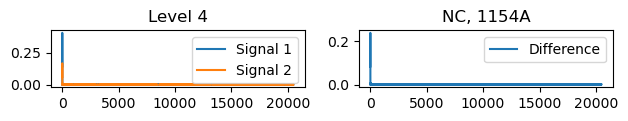

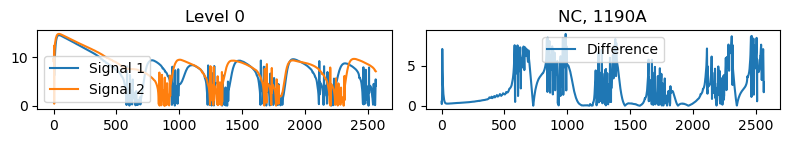

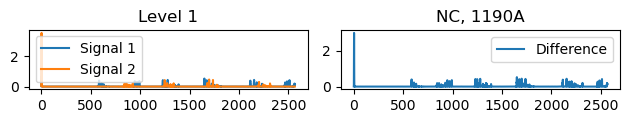

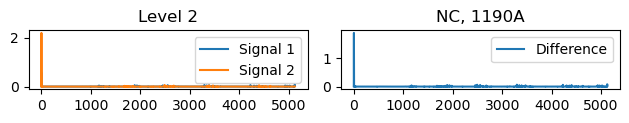

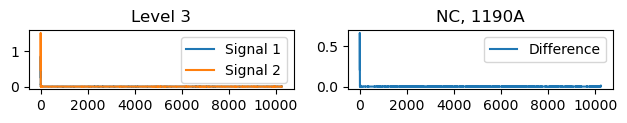

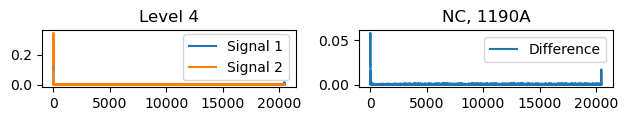

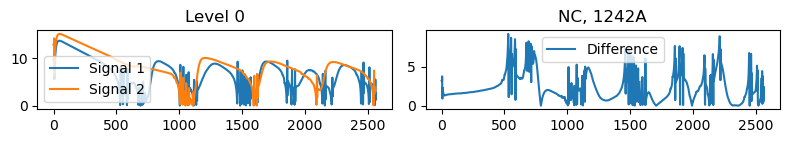

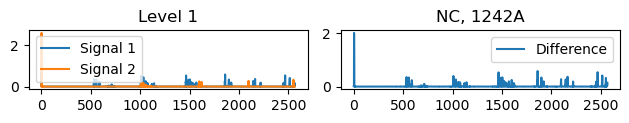

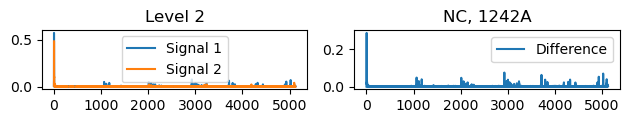

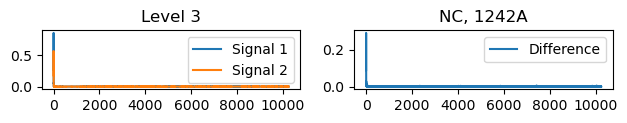

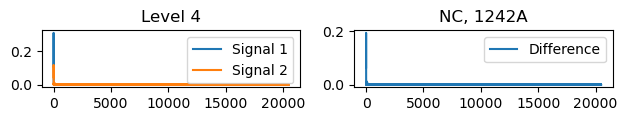

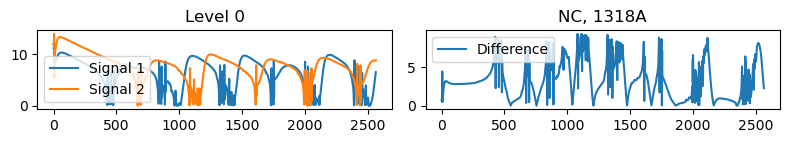

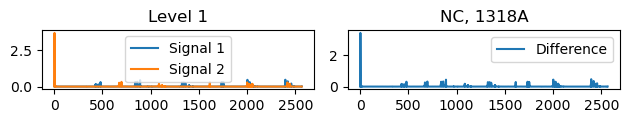

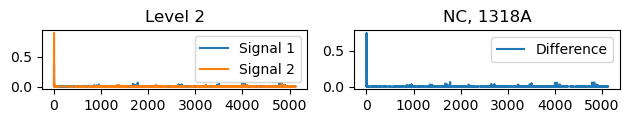

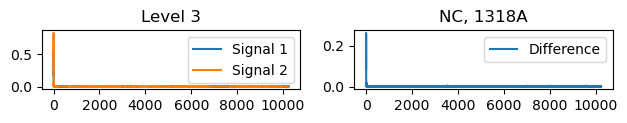

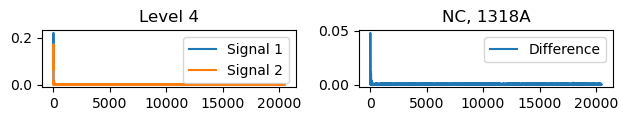

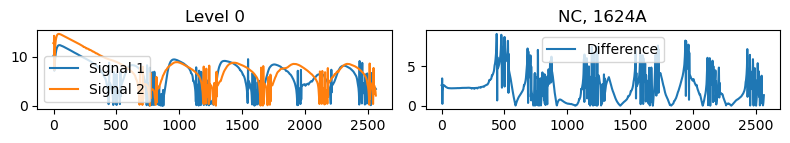

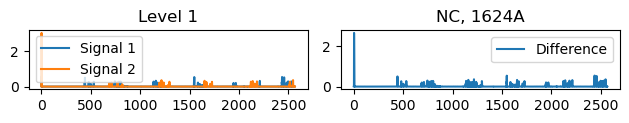

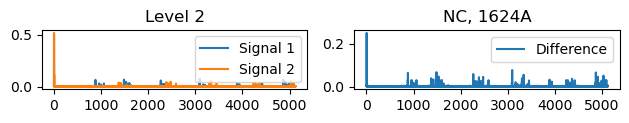

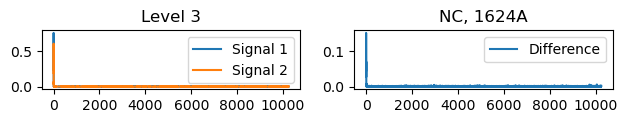

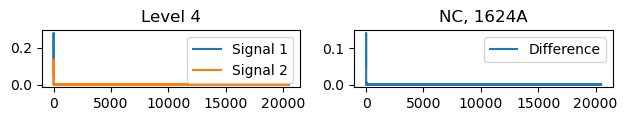

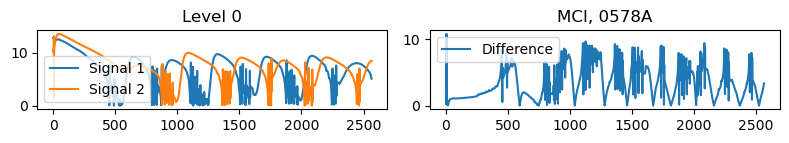

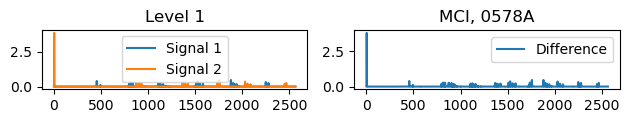

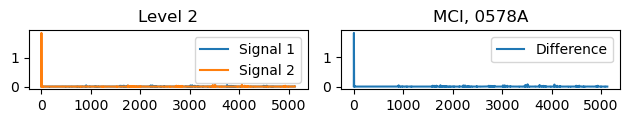

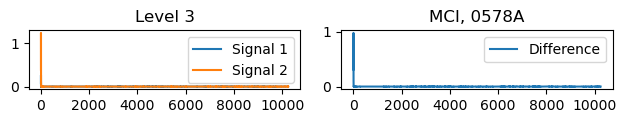

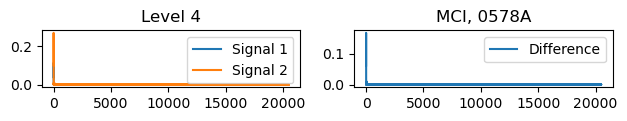

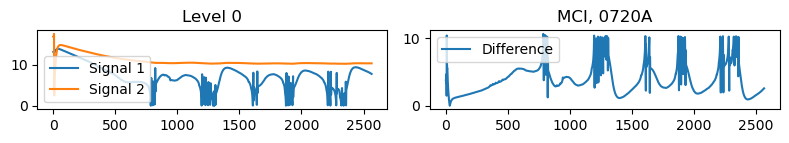

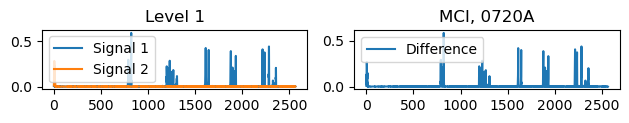

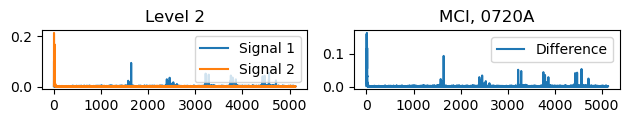

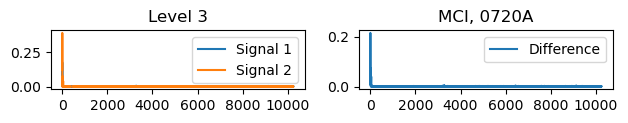

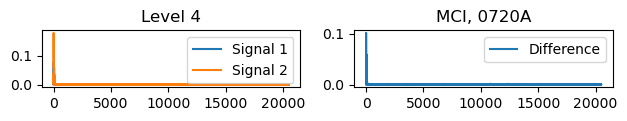

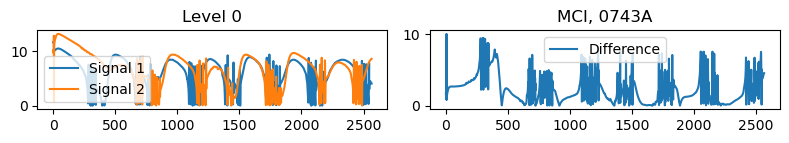

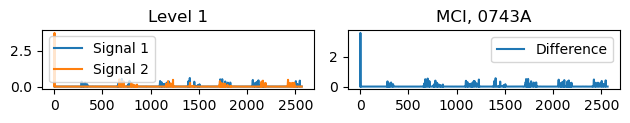

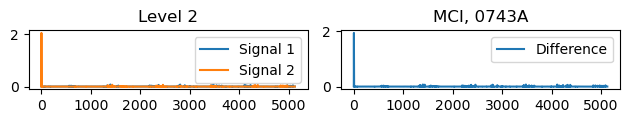

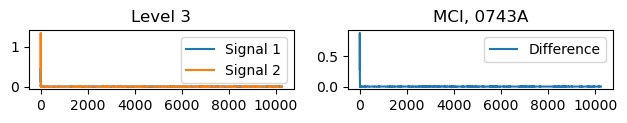

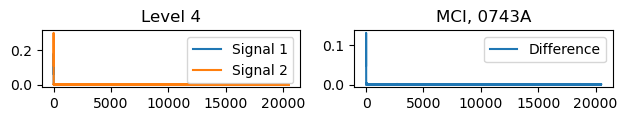

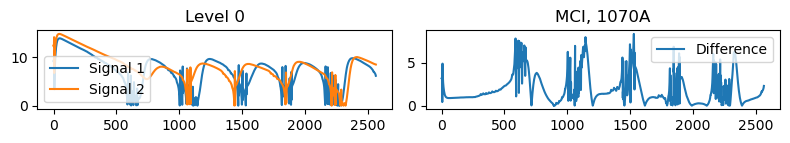

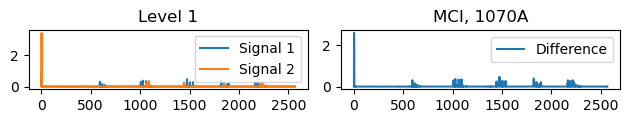

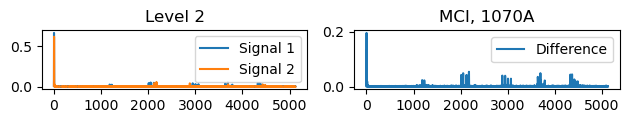

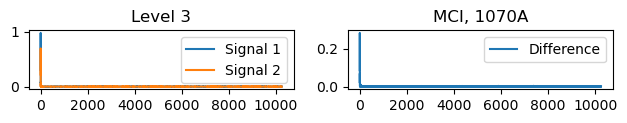

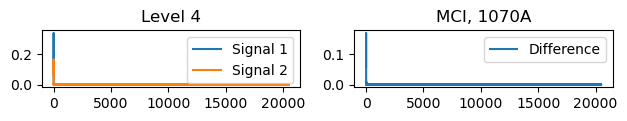

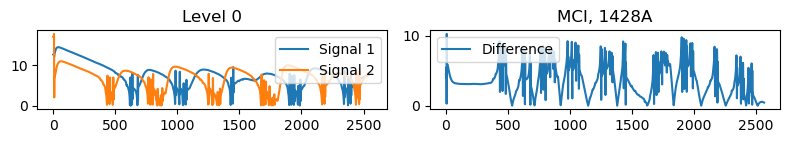

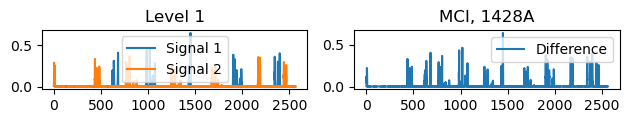

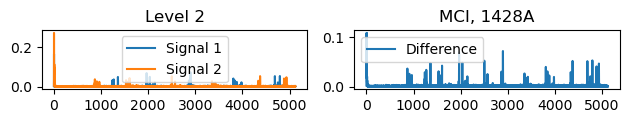

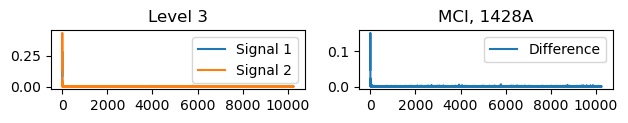

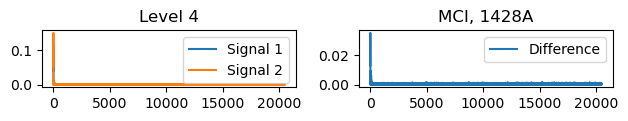

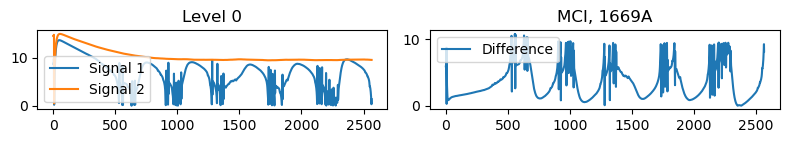

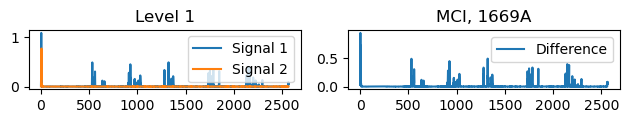

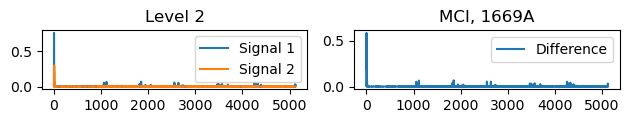

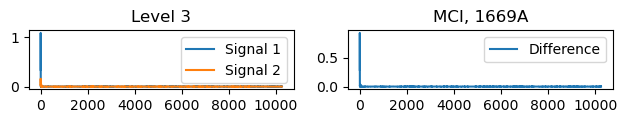

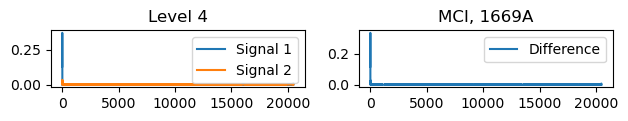

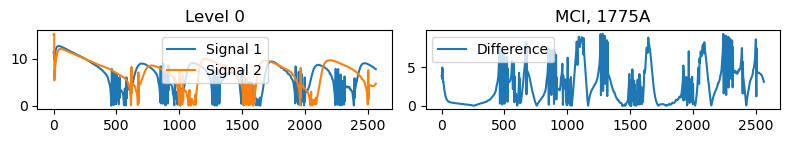

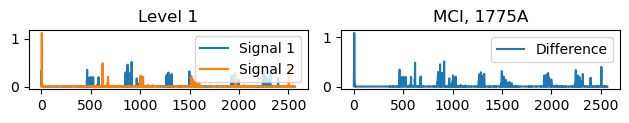

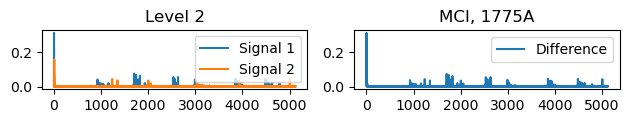

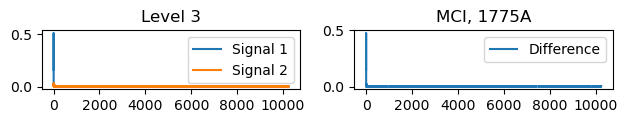

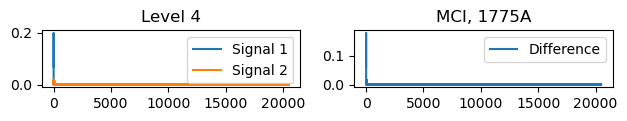

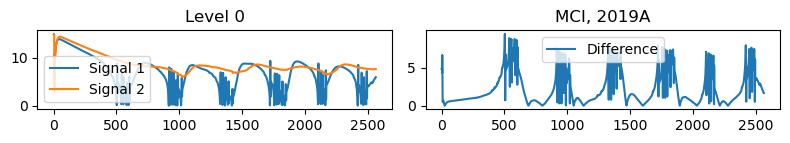

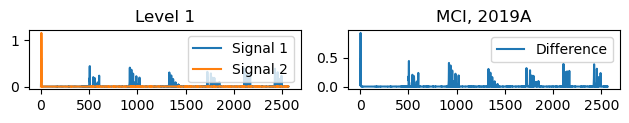

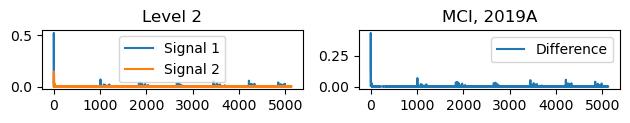

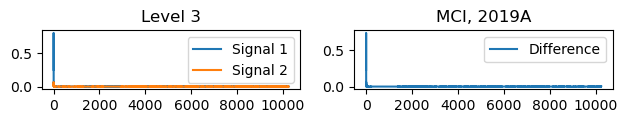

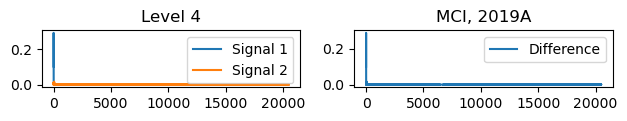

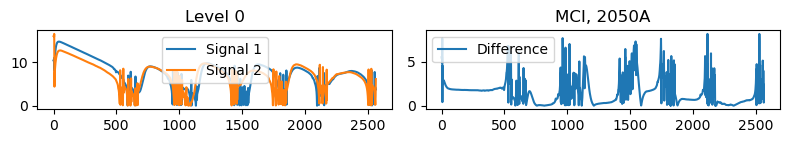

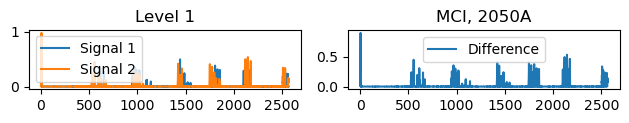

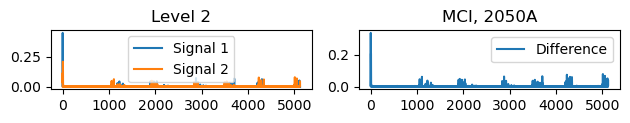

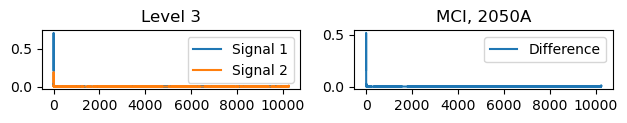

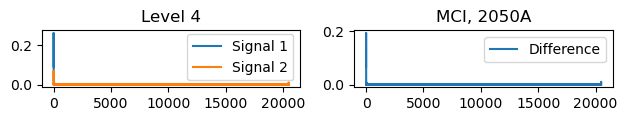

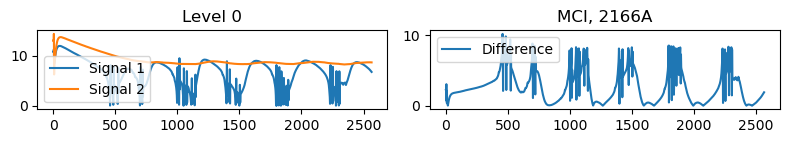

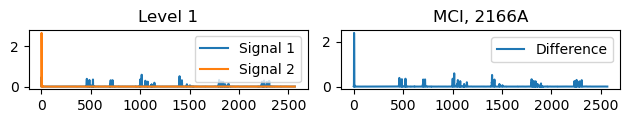

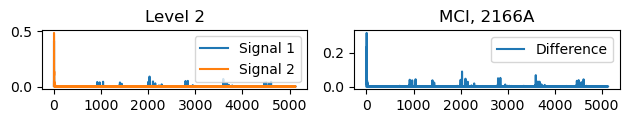

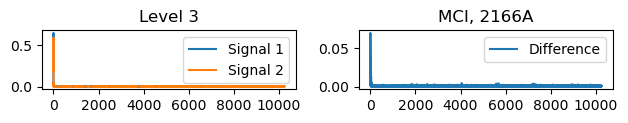

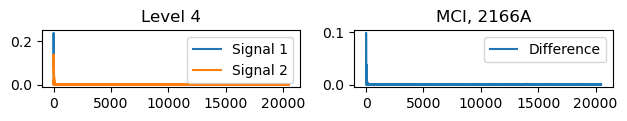

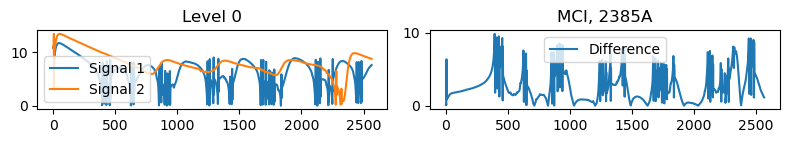

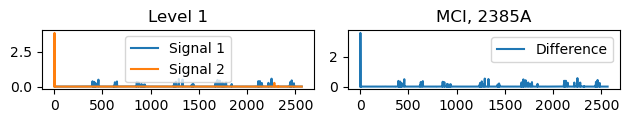

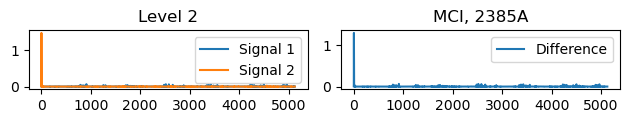

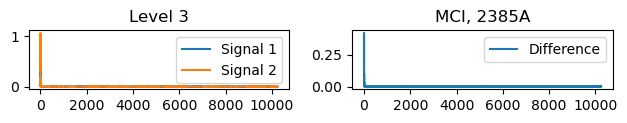

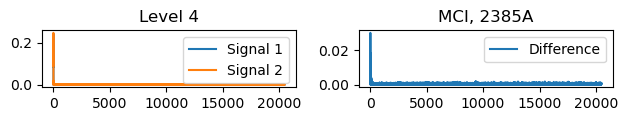

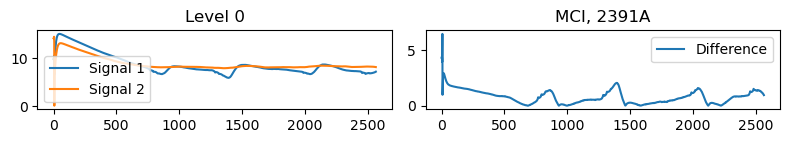

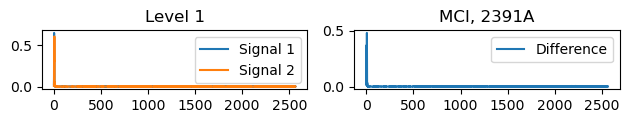

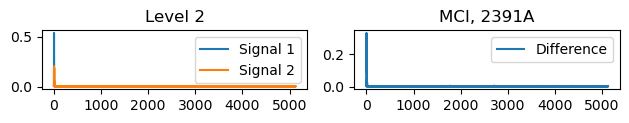

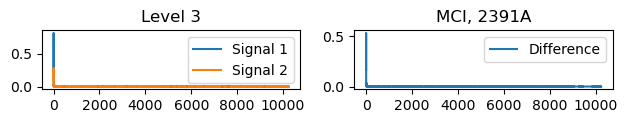

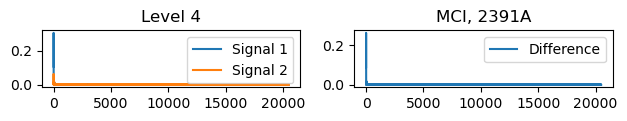

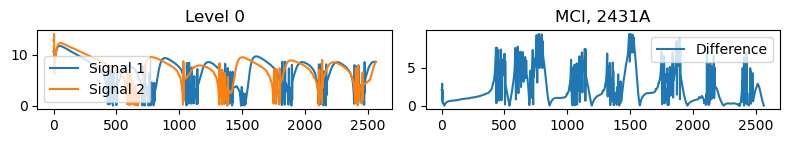

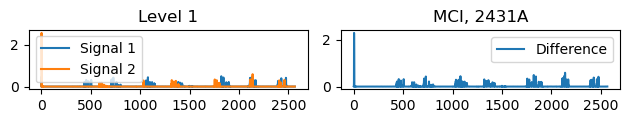

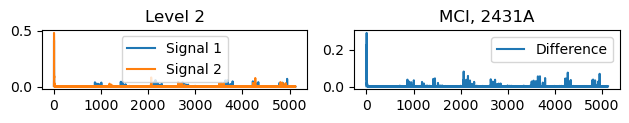

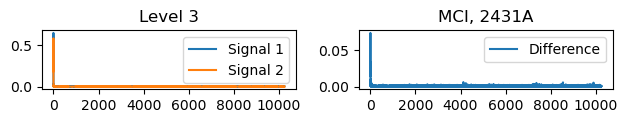

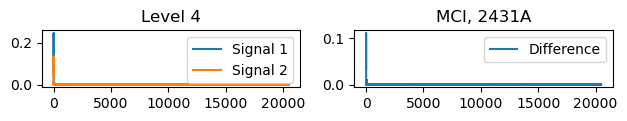

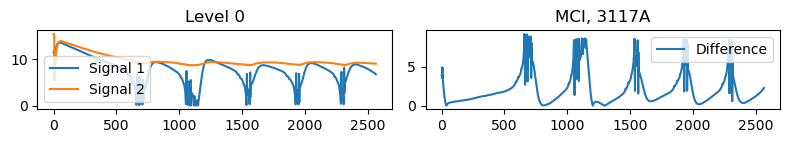

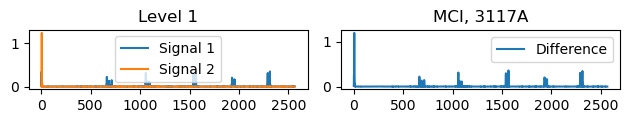

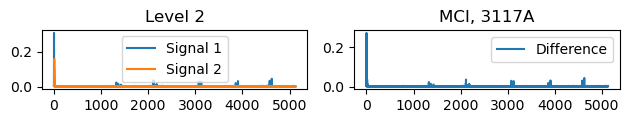

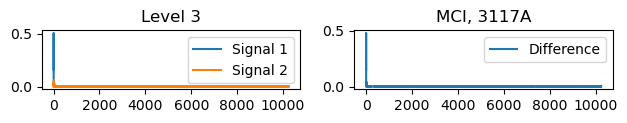

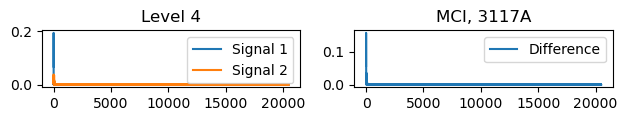

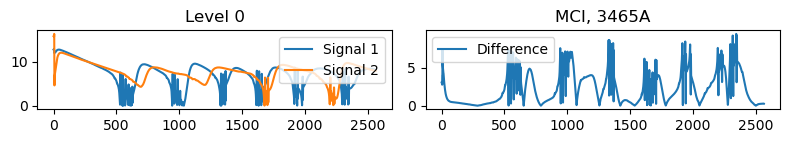

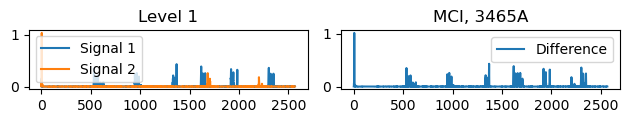

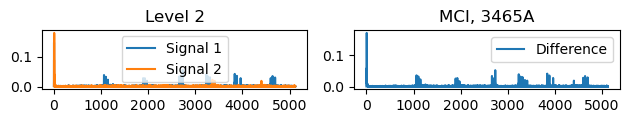

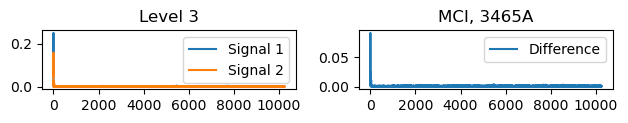

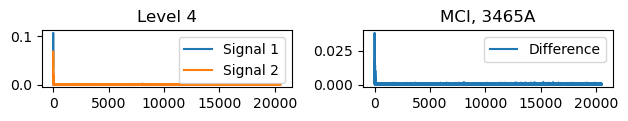

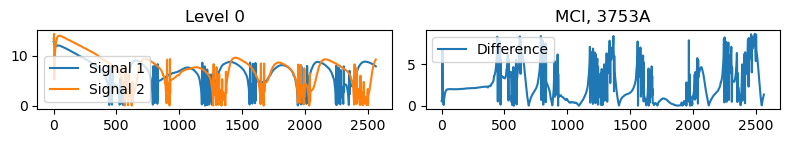

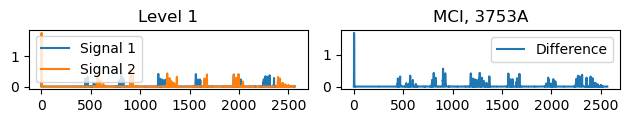

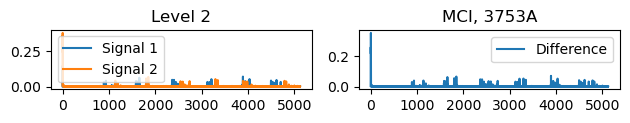

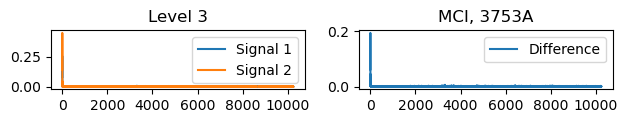

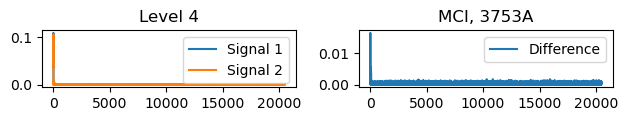

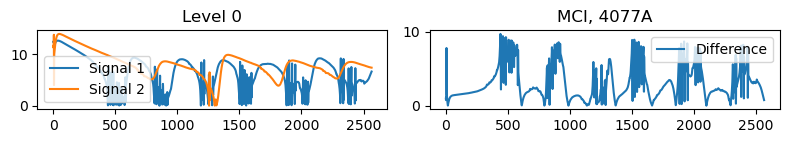

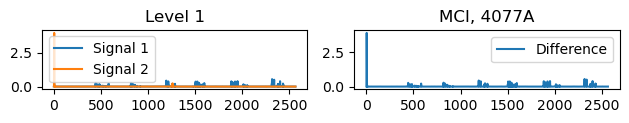

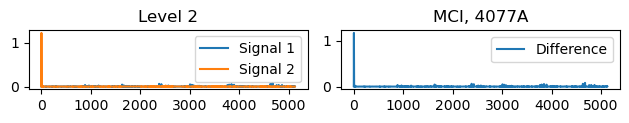

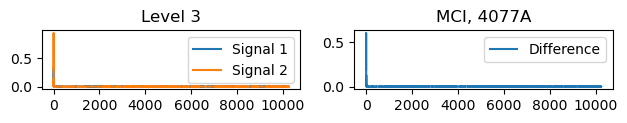

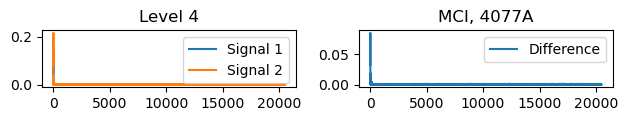

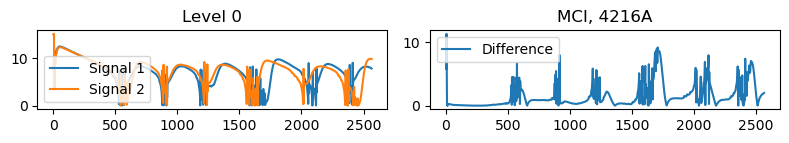

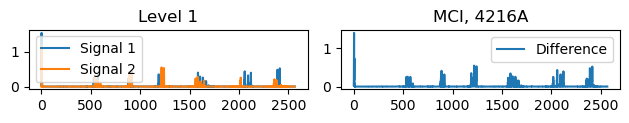

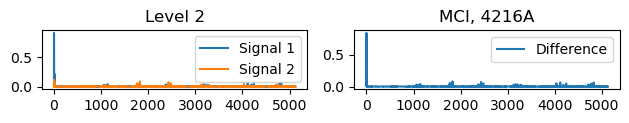

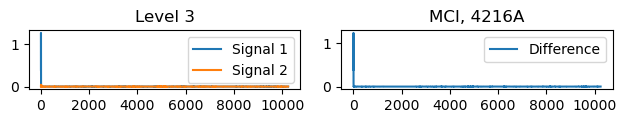

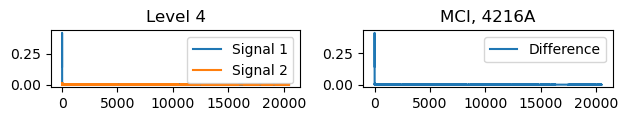

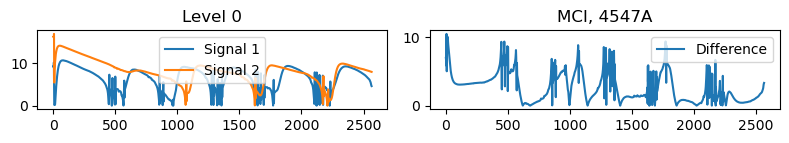

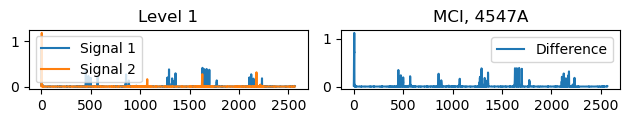

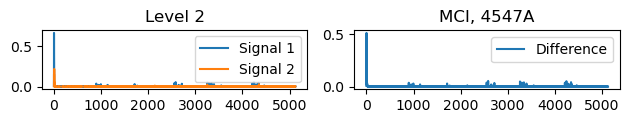

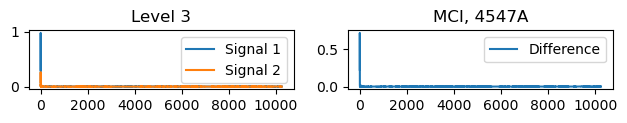

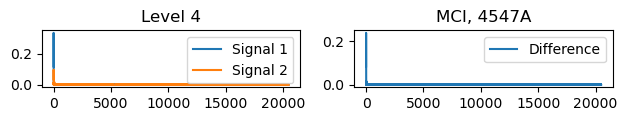

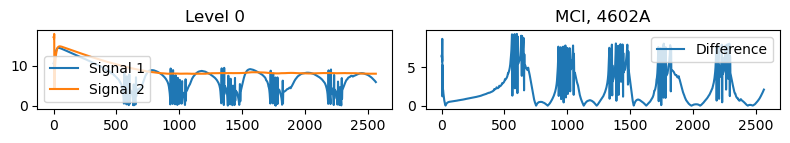

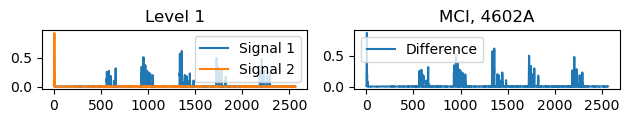

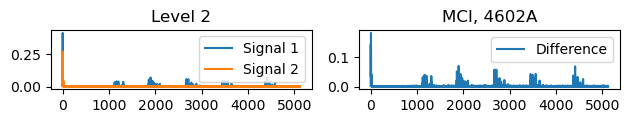

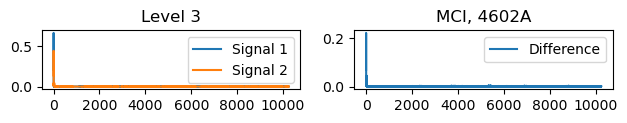

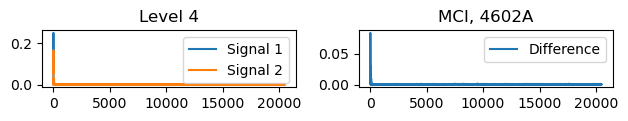

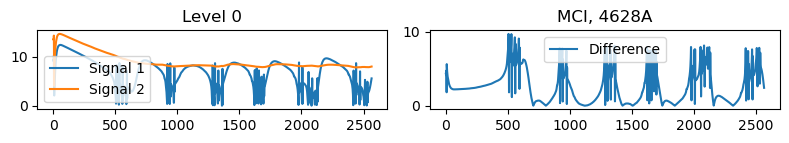

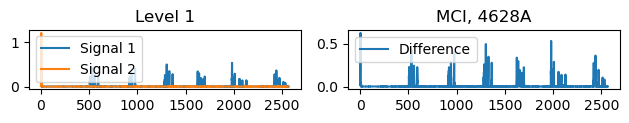

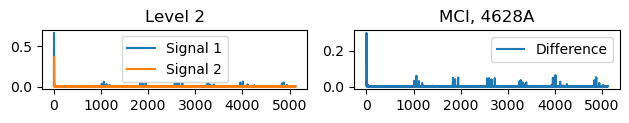

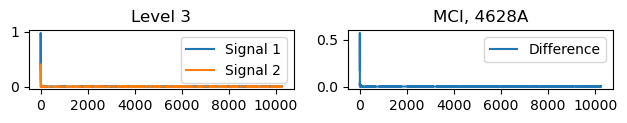

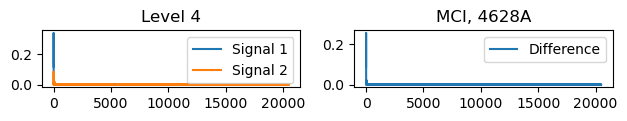

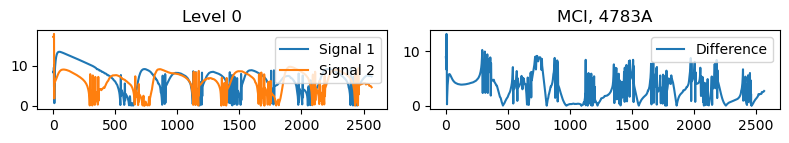

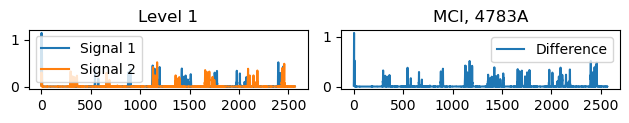

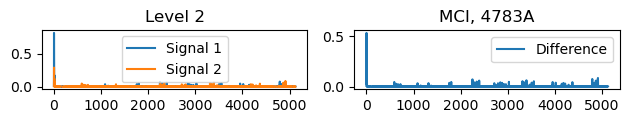

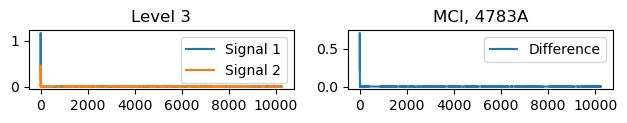

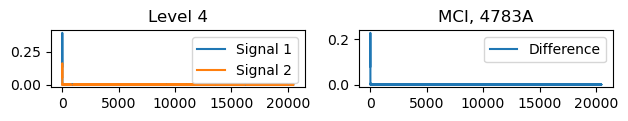

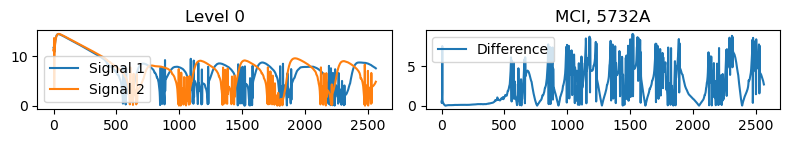

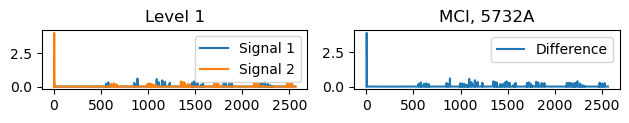

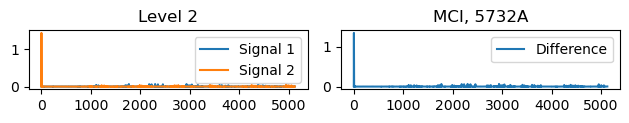

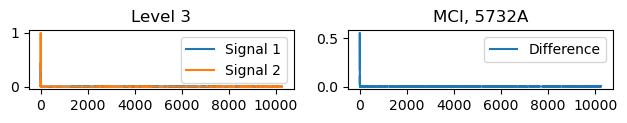

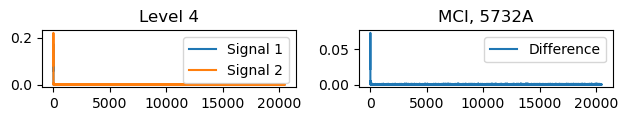

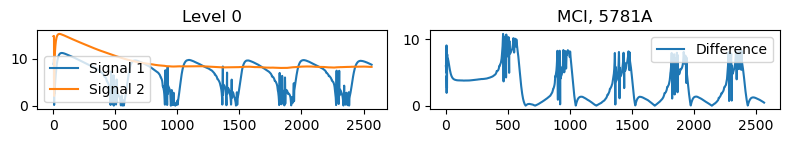

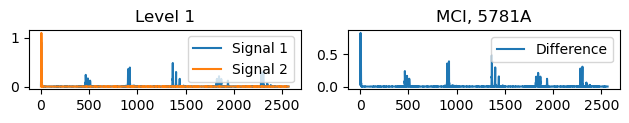

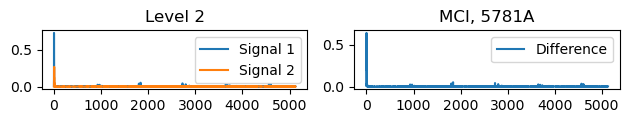

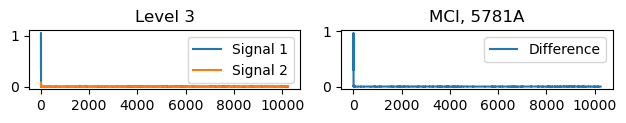

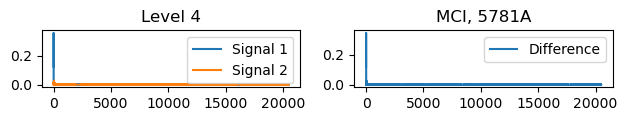

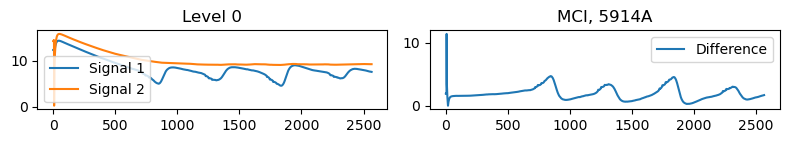

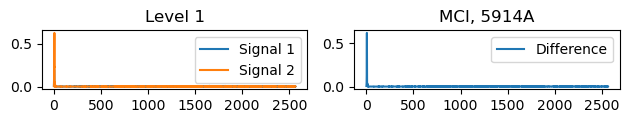

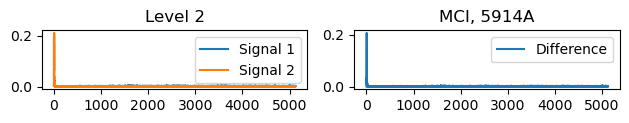

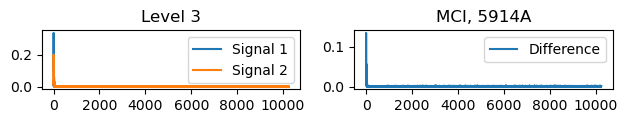

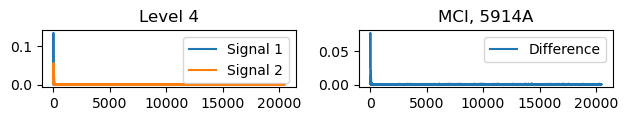

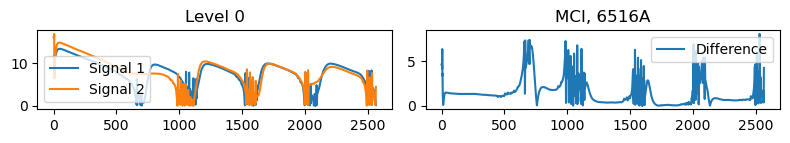

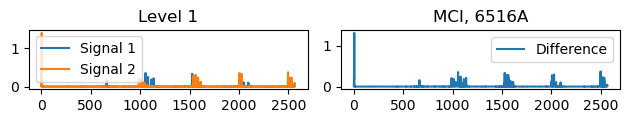

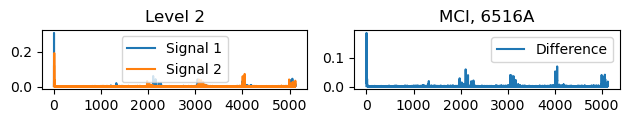

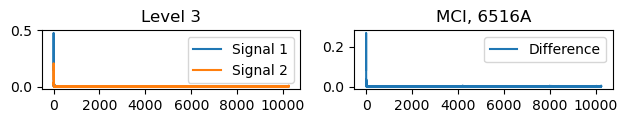

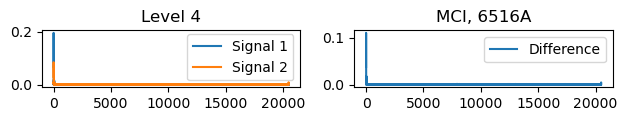

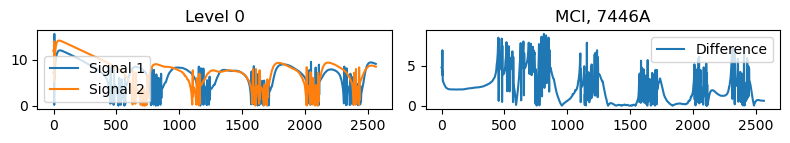

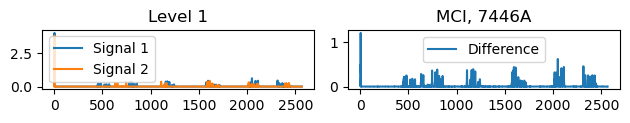

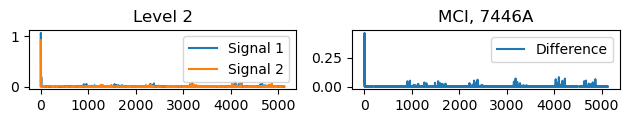

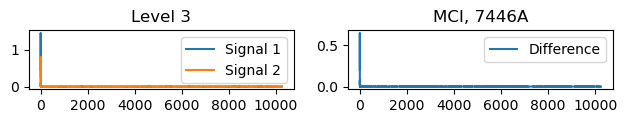

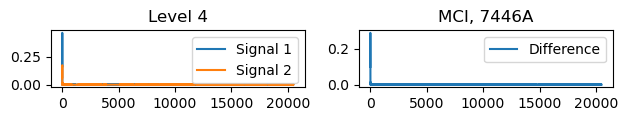

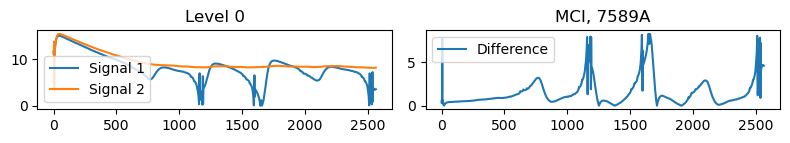

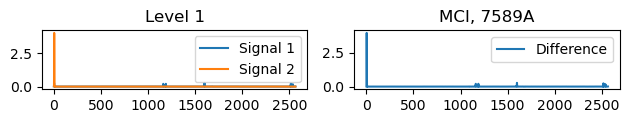

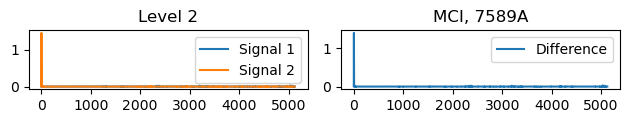

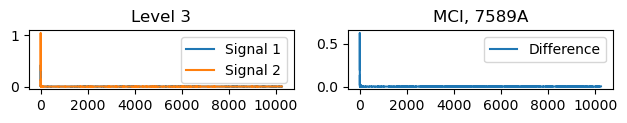

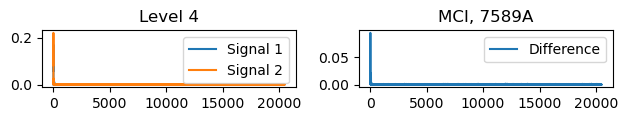

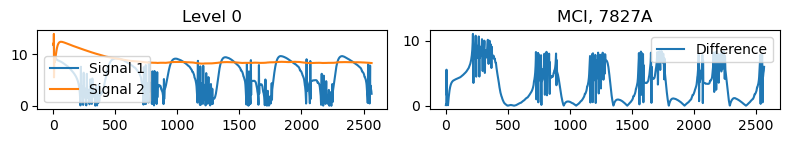

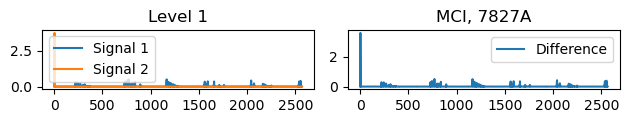

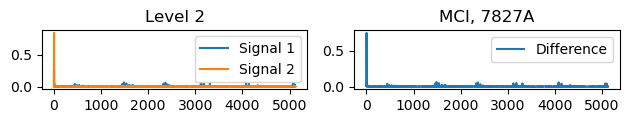

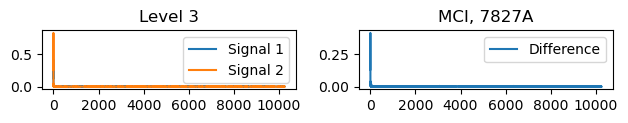

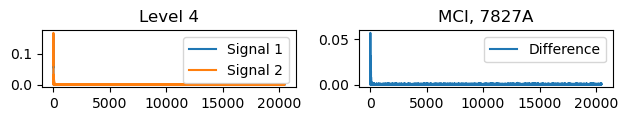

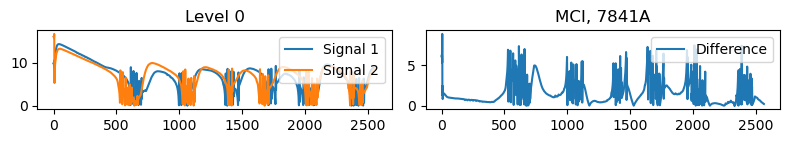

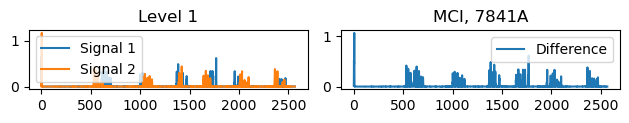

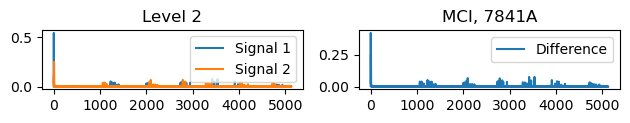

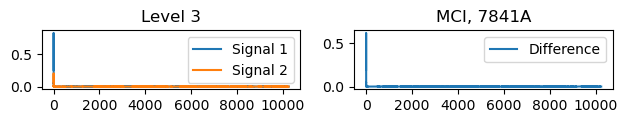

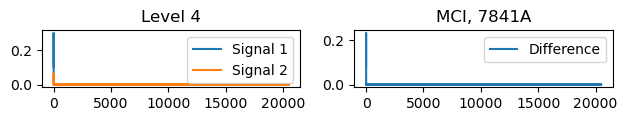

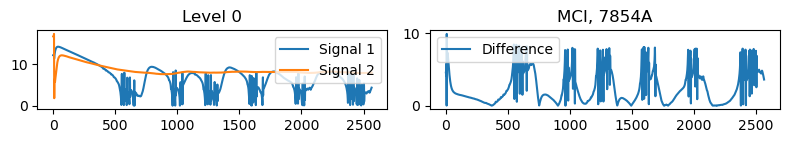

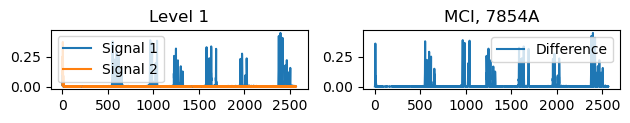

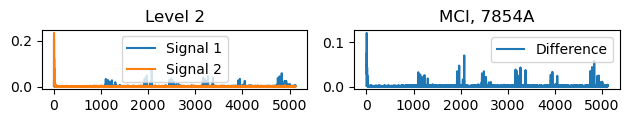

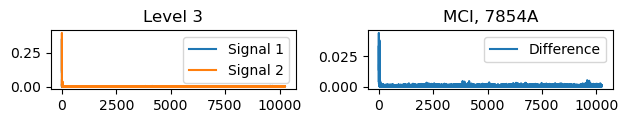

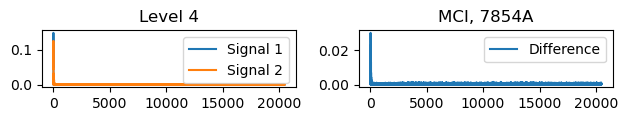

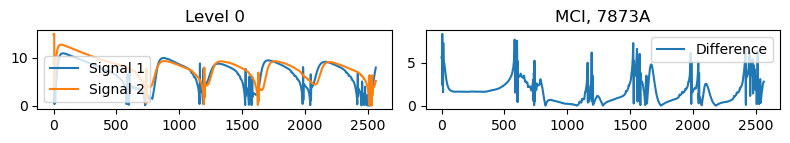

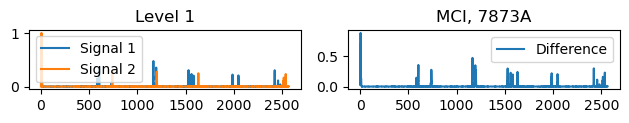

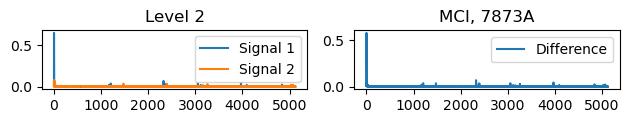

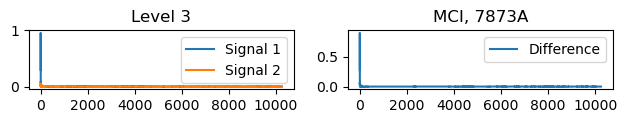

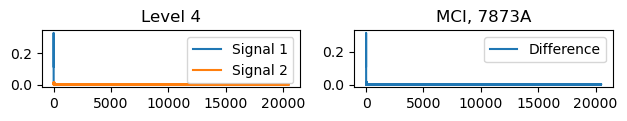

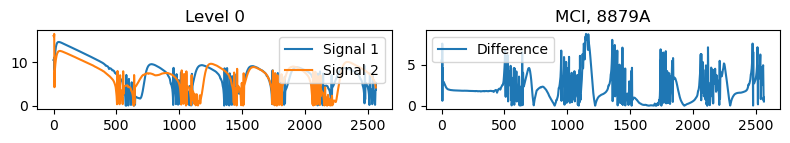

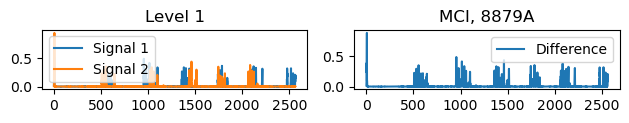

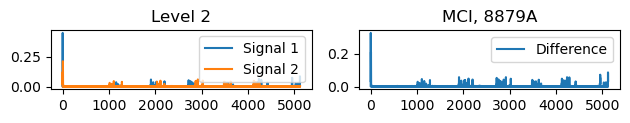

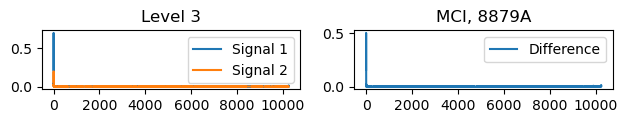

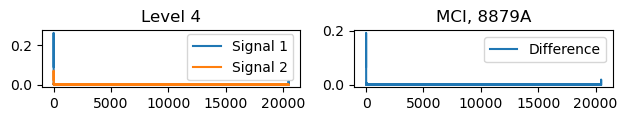

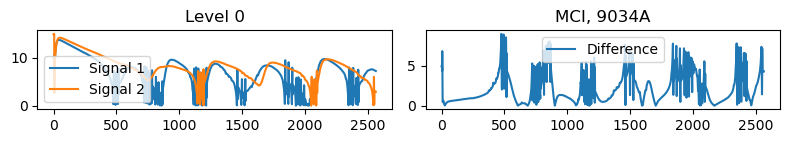

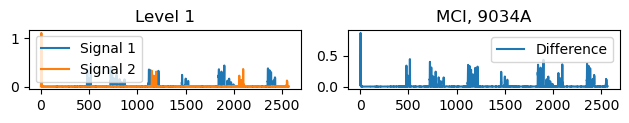

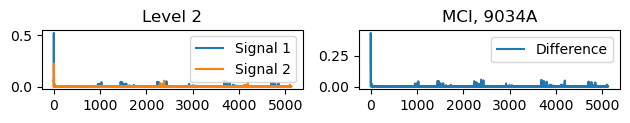

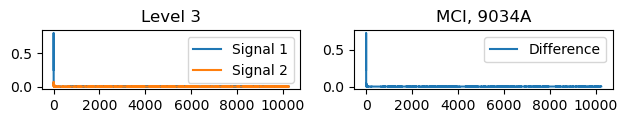

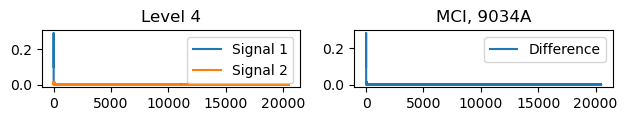

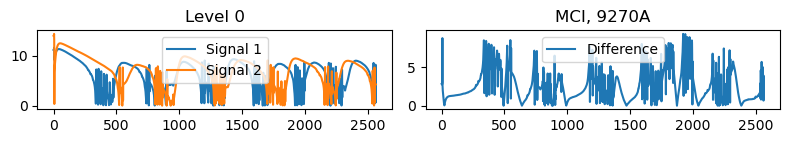

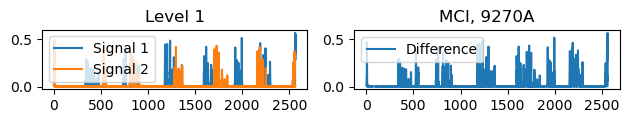

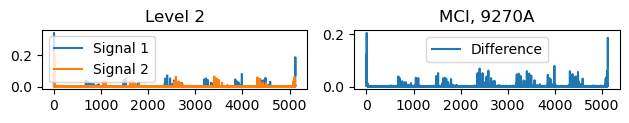

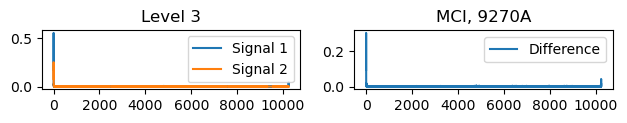

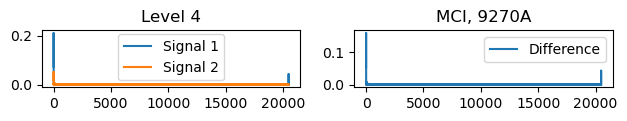

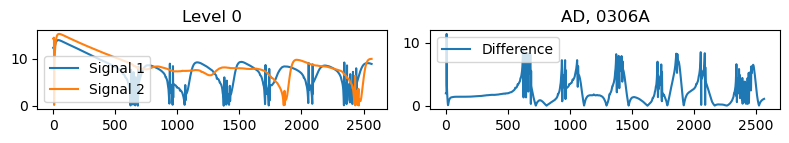

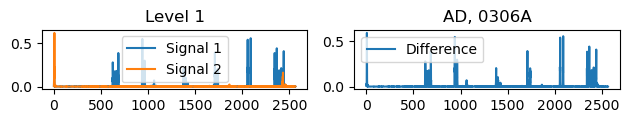

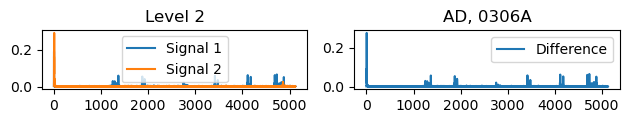

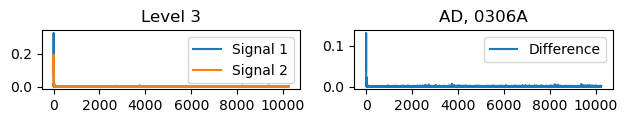

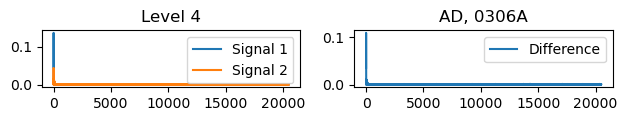

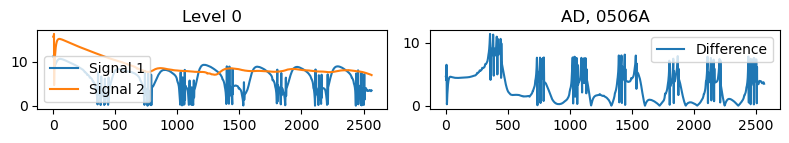

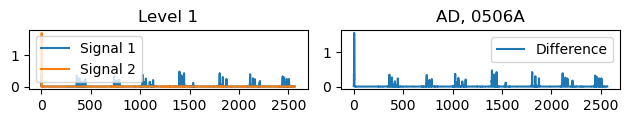

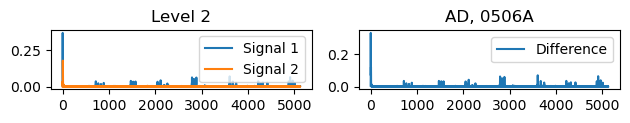

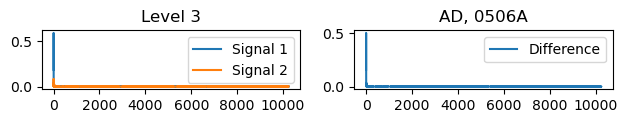

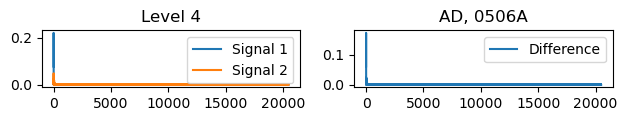

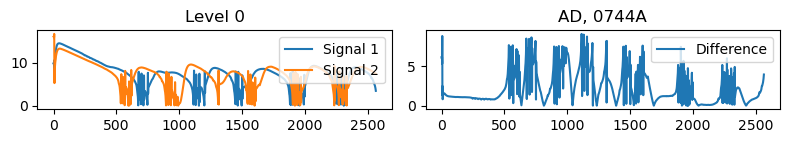

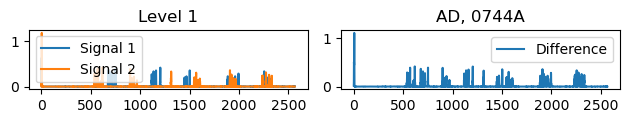

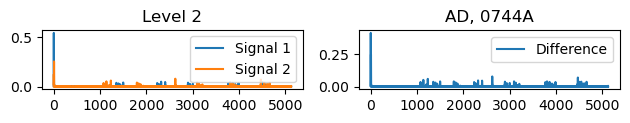

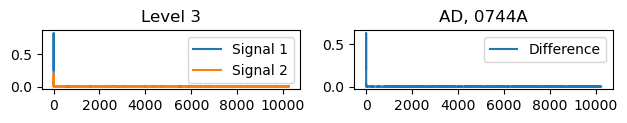

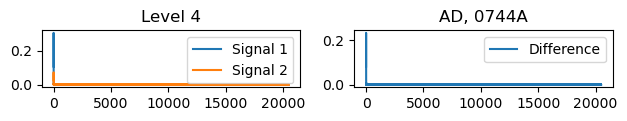

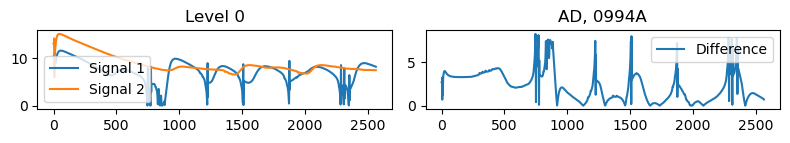

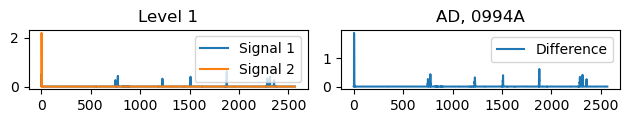

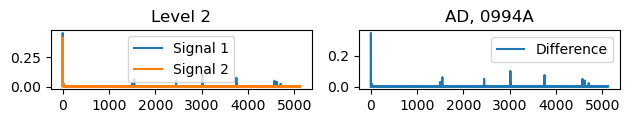

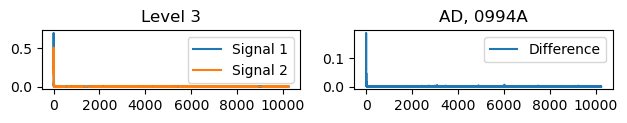

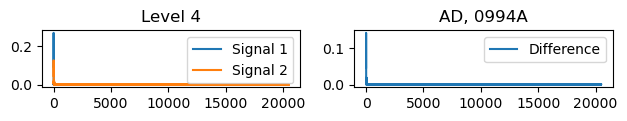

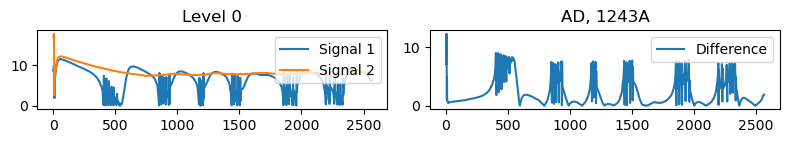

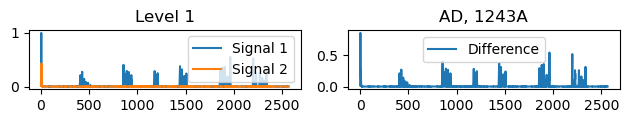

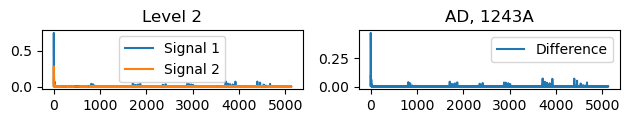

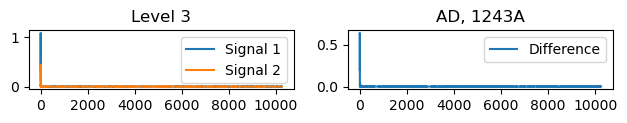

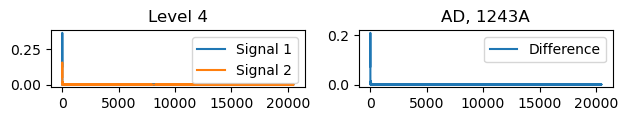

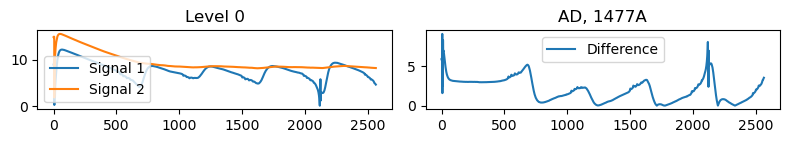

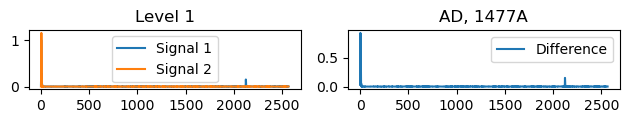

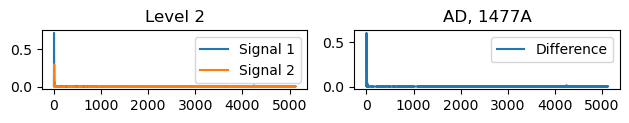

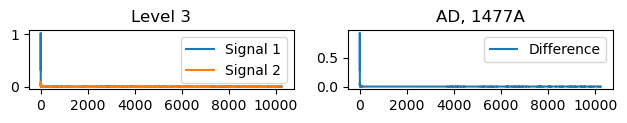

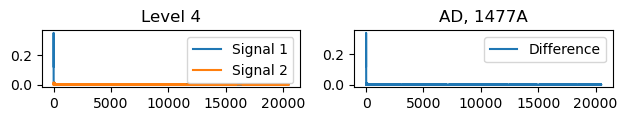

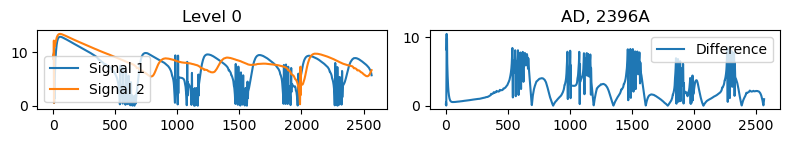

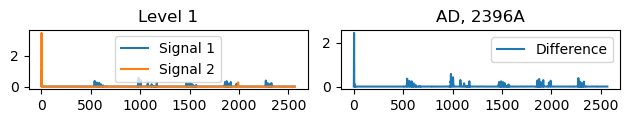

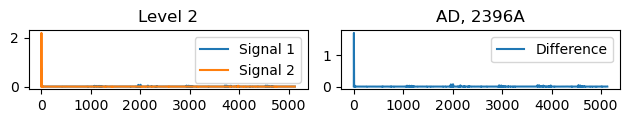

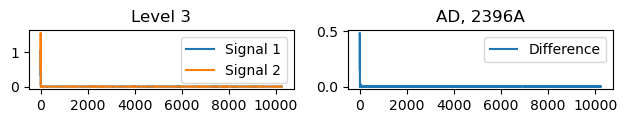

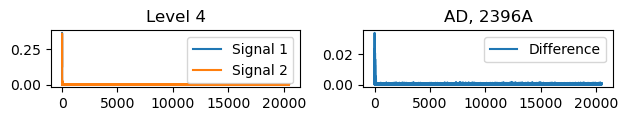

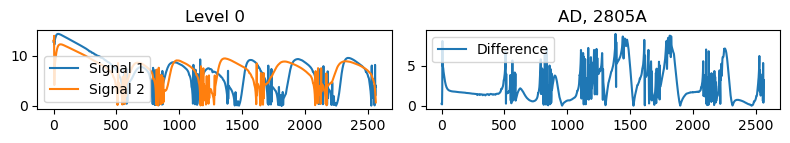

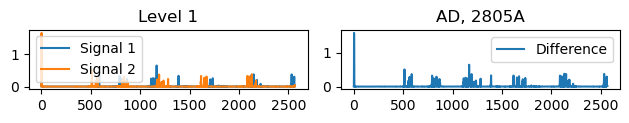

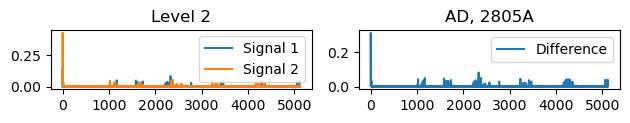

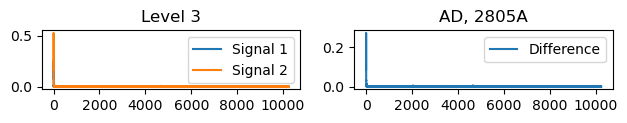

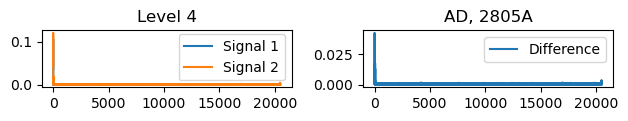

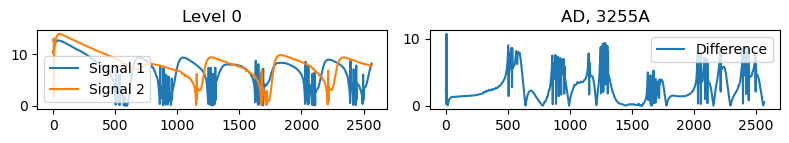

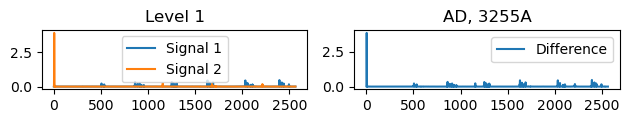

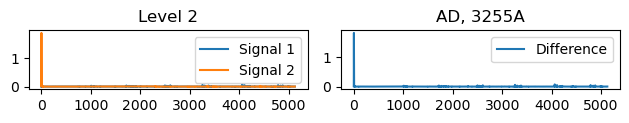

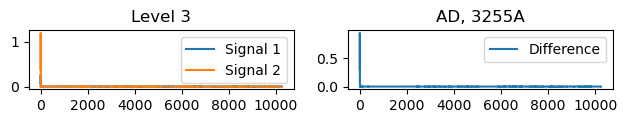

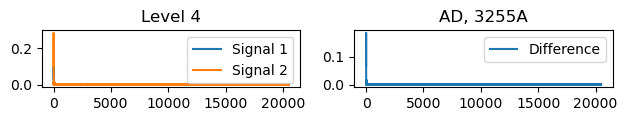

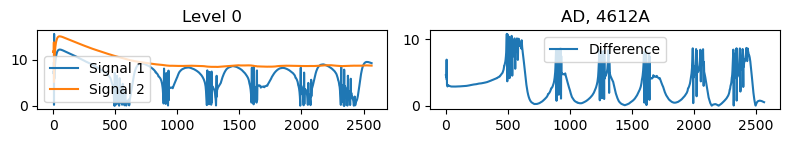

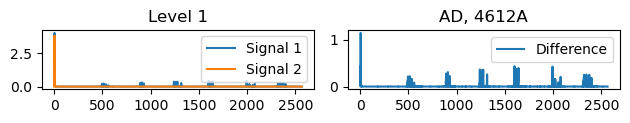

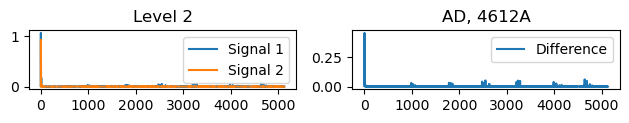

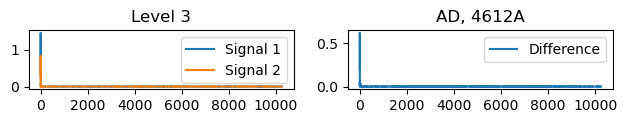

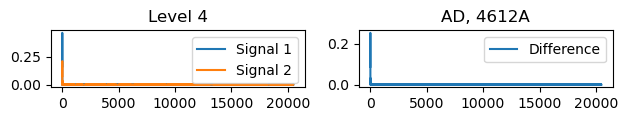

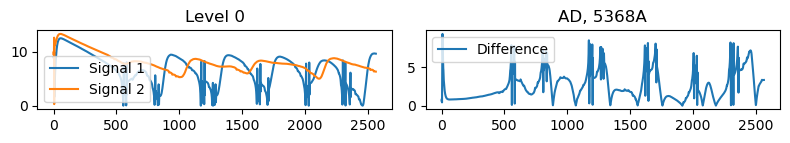

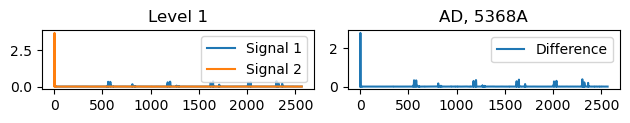

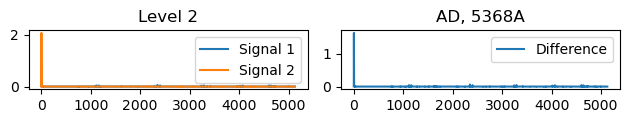

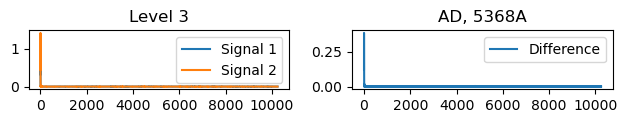

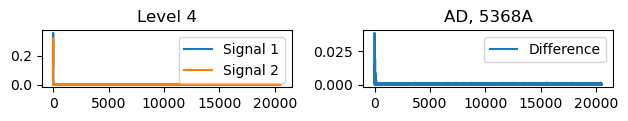

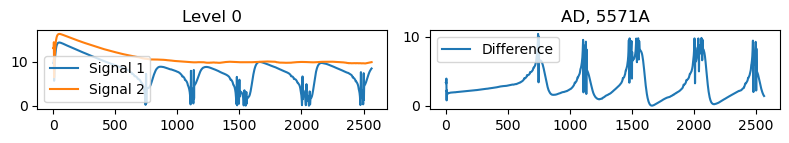

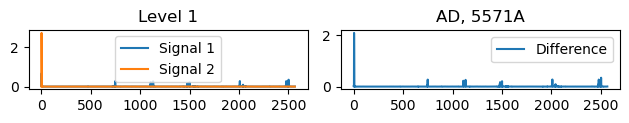

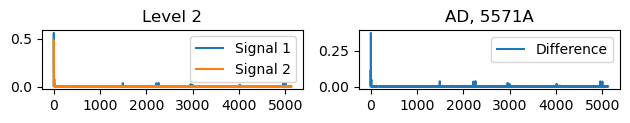

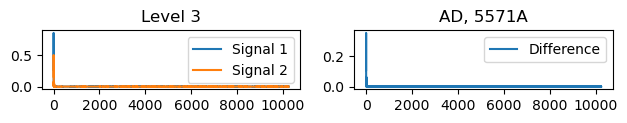

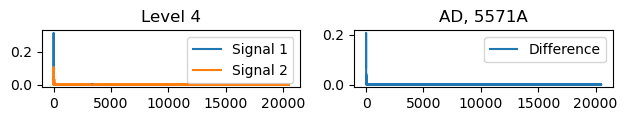

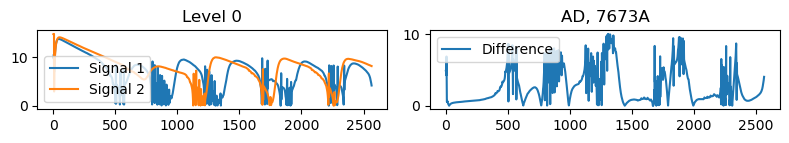

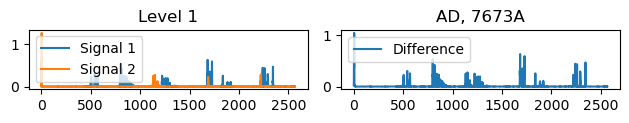

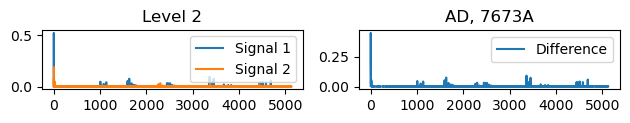

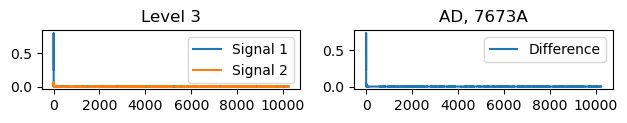

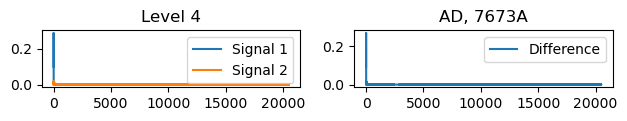

In [41]:
# Generate two sample signals
t = np.linspace(0, 10, 1000)
x1 = np.sin(2 * np.pi * 5 * t)
x2 = np.sin(2 * np.pi * 5 * t + np.pi/4)




df = pd.read_excel('/Users/yat-lok/workspaces/data4project/mega_table.xlsx', sheet_name='tvb_parameters')
for grp, case, gc in zip(df['group'], df['caseid'], df['Gc']):
    path = '/Users/yat-lok/workspaces/data4project/lateralization/LFP_critical/'+grp+'/'+case+'_'+str(gc)+'.csv'
    data = pd.read_csv(path)
    x1 = data['pCNG-L']
    x2 = data['pCNG-R']
    # x1_theta = SignalToolkit.hamming_filter( x1, [2, 10])
    # x2_theta = SignalToolkit.hamming_filter( x2, [2, 10])
    # figure = plt.figure()
    # plt.plot(x1_theta)
    # plt.plot(x2_theta)
    wavelet_diff(x2, x1, grp, case)


